# Analyse Experiments Results

## Introduction
The results obtained from the three types of synthetic data (duplicate, synergy, complementary).

Comparison through all the different methods will be done (exact shap, contextcite, tmc, ...).

## Imports

In [75]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

## Load & Process Data

In [40]:
df = pd.read_csv("../data/synthetic_data/results/scoring.csv")
df_duplicate = pd.read_csv("../data/synthetic_data/duplicate.csv")
df_synergy = pd.read_csv('../data/synthetic_data/synergy.csv')
df_complementary = pd.read_csv('../data/synthetic_data/complementary.csv')
df.head()

,query,context,provided_answer,scoring,doc_flags
0,What is the primary component of a Xylotian 'G...,"[[[""The Glimmer-sails of Xylos are renowned fo...",The primary component of a Xylotian 'Glimmer-s...,"[{'Exact': array([42.87578957, -1.96813188, -2...",NaN
1,How do Xylotians communicate over long distanc...,"[[[""Xylotians employ networks of 'Resonance To...",Xylotians use networks of 'Resonance Towers' t...,"[{'Exact': array([53.46069211, 22.47212639, -0...",NaN
2,What is the main energy source for Xylotian 'H...,"[[[""The personal Hover-platforms used by Xylot...",The main energy source for Xylotian 'Hover-pla...,"[{'Exact': array([ 8.59737743, 32.22933839, -4...",NaN
3,What unique property does 'Chrono-Dust' posses...,"[[['Xylotian legends speak of Chrono-Dust, a r...","According to Xylotian lore, Chrono-Dust posses...","[{'Exact': array([35.59448288, 48.05295873, -5...",NaN
4,What are 'Dream-Weavers' used for in Xylotian ...,"[[[""Xylotian society values communal well-bein...",'Dream-Weavers' in Xylotian society are used t...,"[{'Exact': array([75.94342318, 56.47574265, -0...",NaN


In [ ]:
df_duplicate.rename(columns = {"question" : "query"}, inplace = True) # to facilitate merging
df.context = df.context.apply(lambda x: eval(x)[0][0])
df = df.merge(df_duplicate[["query", "answer"]], how = "left", on = "query")[["query", "context",  "answer", "provided_answer", "scoring"]]


In [144]:
scores_agg = {}
for query in range(df.shape[0]) : 
    scores_agg[query] = eval(df.scoring.loc[query].replace("array", ""))[0]

In [145]:
def plot_scoring_per_query(results : dict, query_id : int, dataset_type : str) :
    
    fig, axes  = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 20), squeeze=False)
    fig.tight_layout(pad = 4.0)
    axes = axes.flatten()

    # colors = ["green" if i < 2 else 'blue' for i in range(len(results))]
    # method_colors = ["green"] * 2 + ["blue"] * 8

    for i, (key, values) in enumerate(results.items()): 

        bars = axes[i].bar(range(10), values) # get the current subplot axis

        for j, bar in enumerate(bars): 
            if j <2: 
                bar.set_color("green")
            else:
                bar.set_color("blue")

        axes[i].set_title(key)
        axes[i].set_xlabel("Document Index")
        axes[i].set_ylabel("Attribution Scores")
        axes[i].grid(True, axis = 'y', linestyle='--', alpha = 0.7)

        # ax.bar(
        #     x = [f"{j}" for j in range(len(values))], 
        #     height = values, 
        #     # color=colors[i], 
        #     color = method_colors[i],
        #     label = key
        # )


    # ax.set_title(f"Scoring for query {query_id}")
    # ax.set_ylabel("Attribution Scores")
    # ax.set_xlabel("Document Index")
    # ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    # ax.legend()
    # plt.xticks(rotation = 45, ha = "right")
    plt.tight_layout()
    plt.savefig(f"../data/synthetic_data/plots/{dataset_type}_Q{query_id}.png")
    plt.show()
    plt.close()

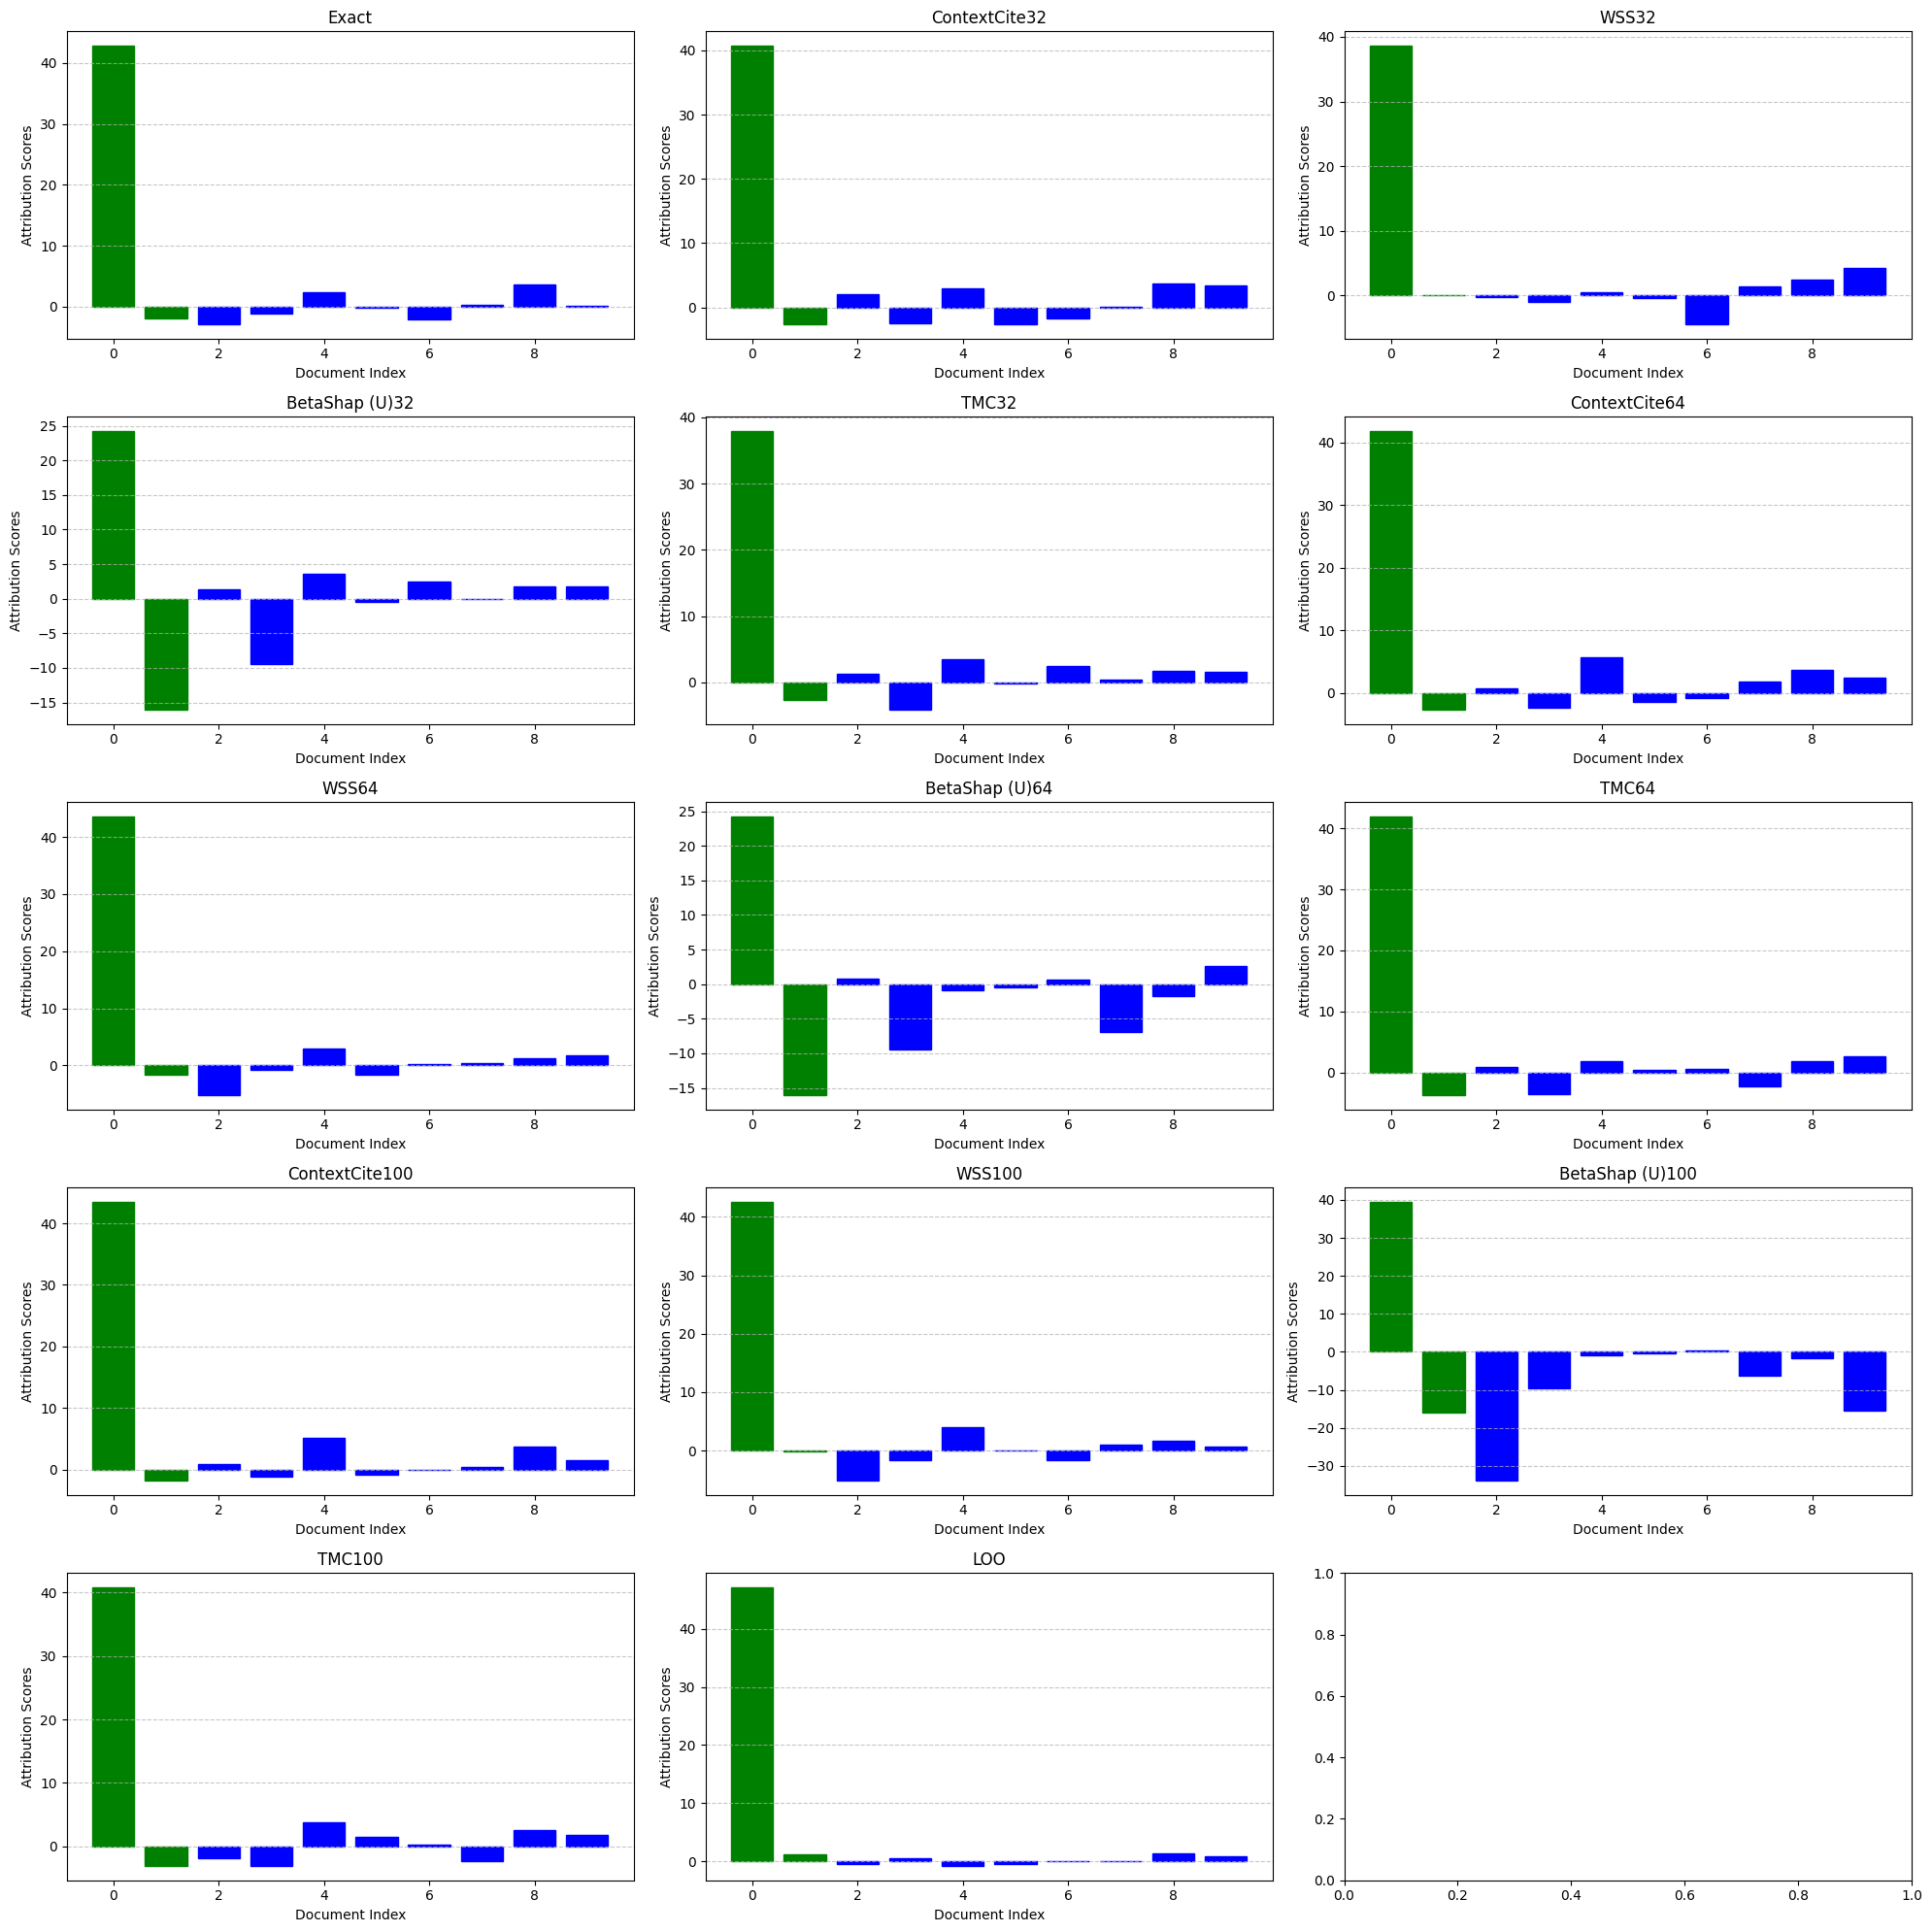

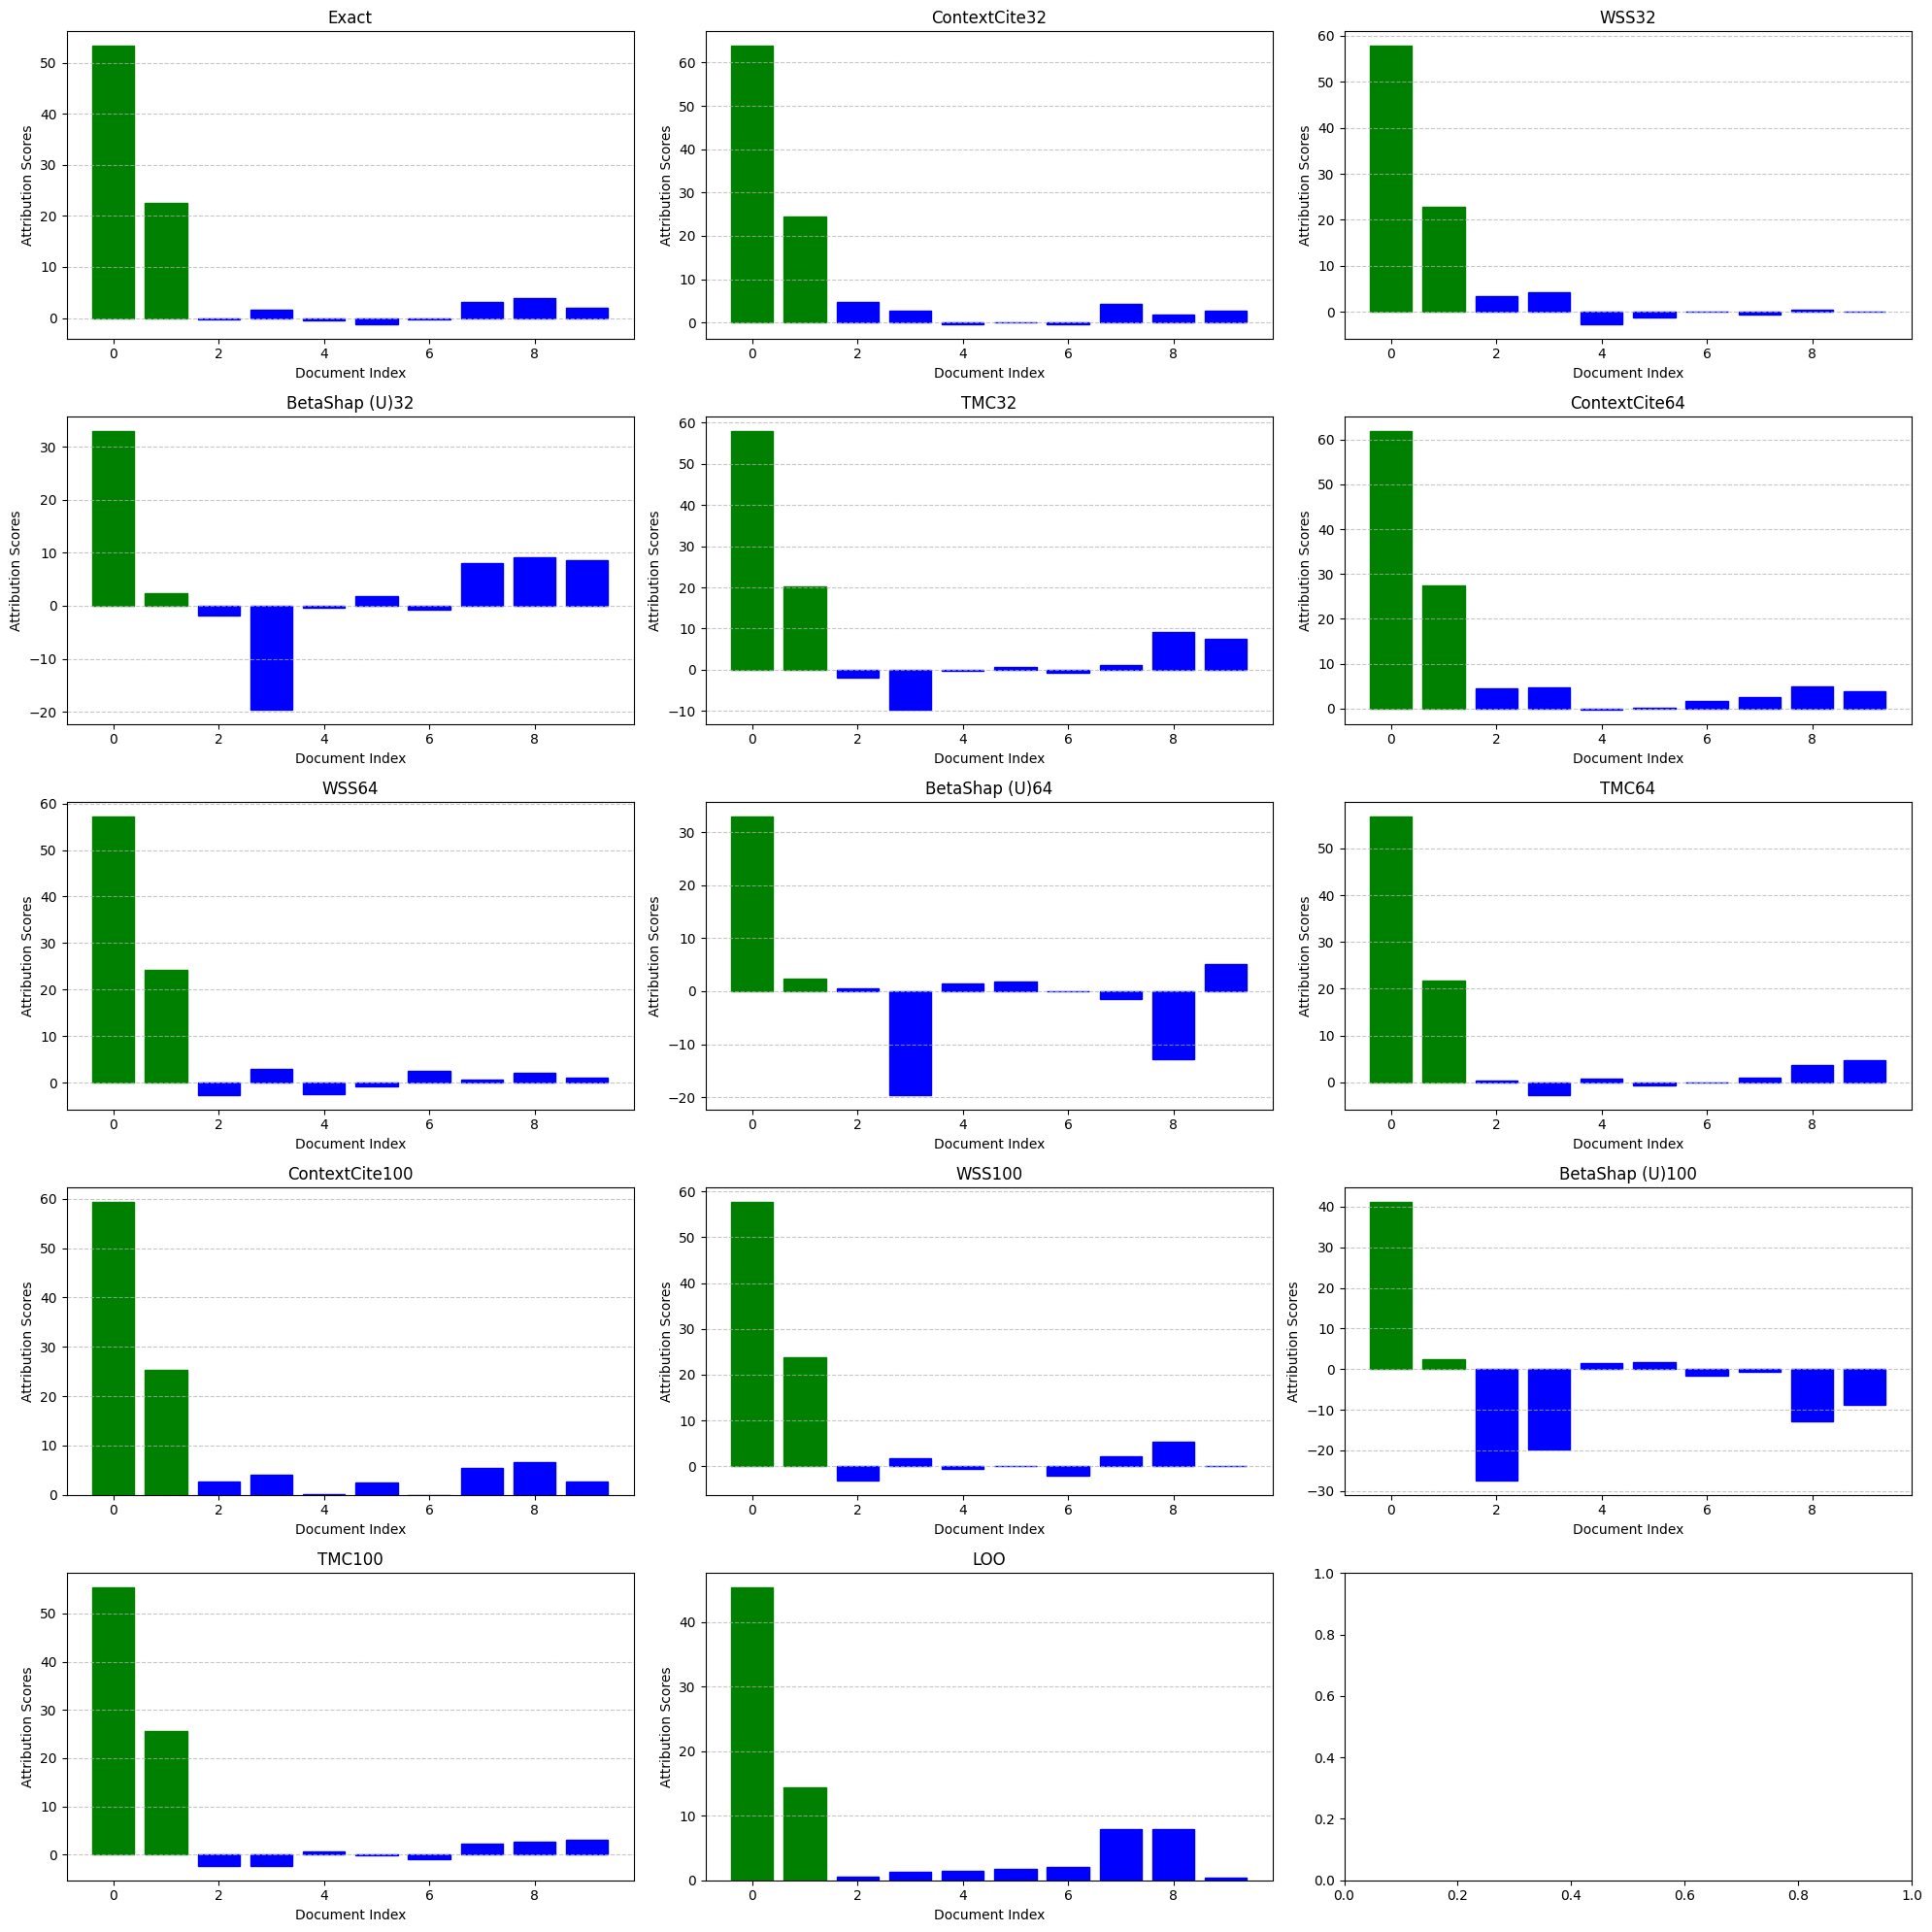

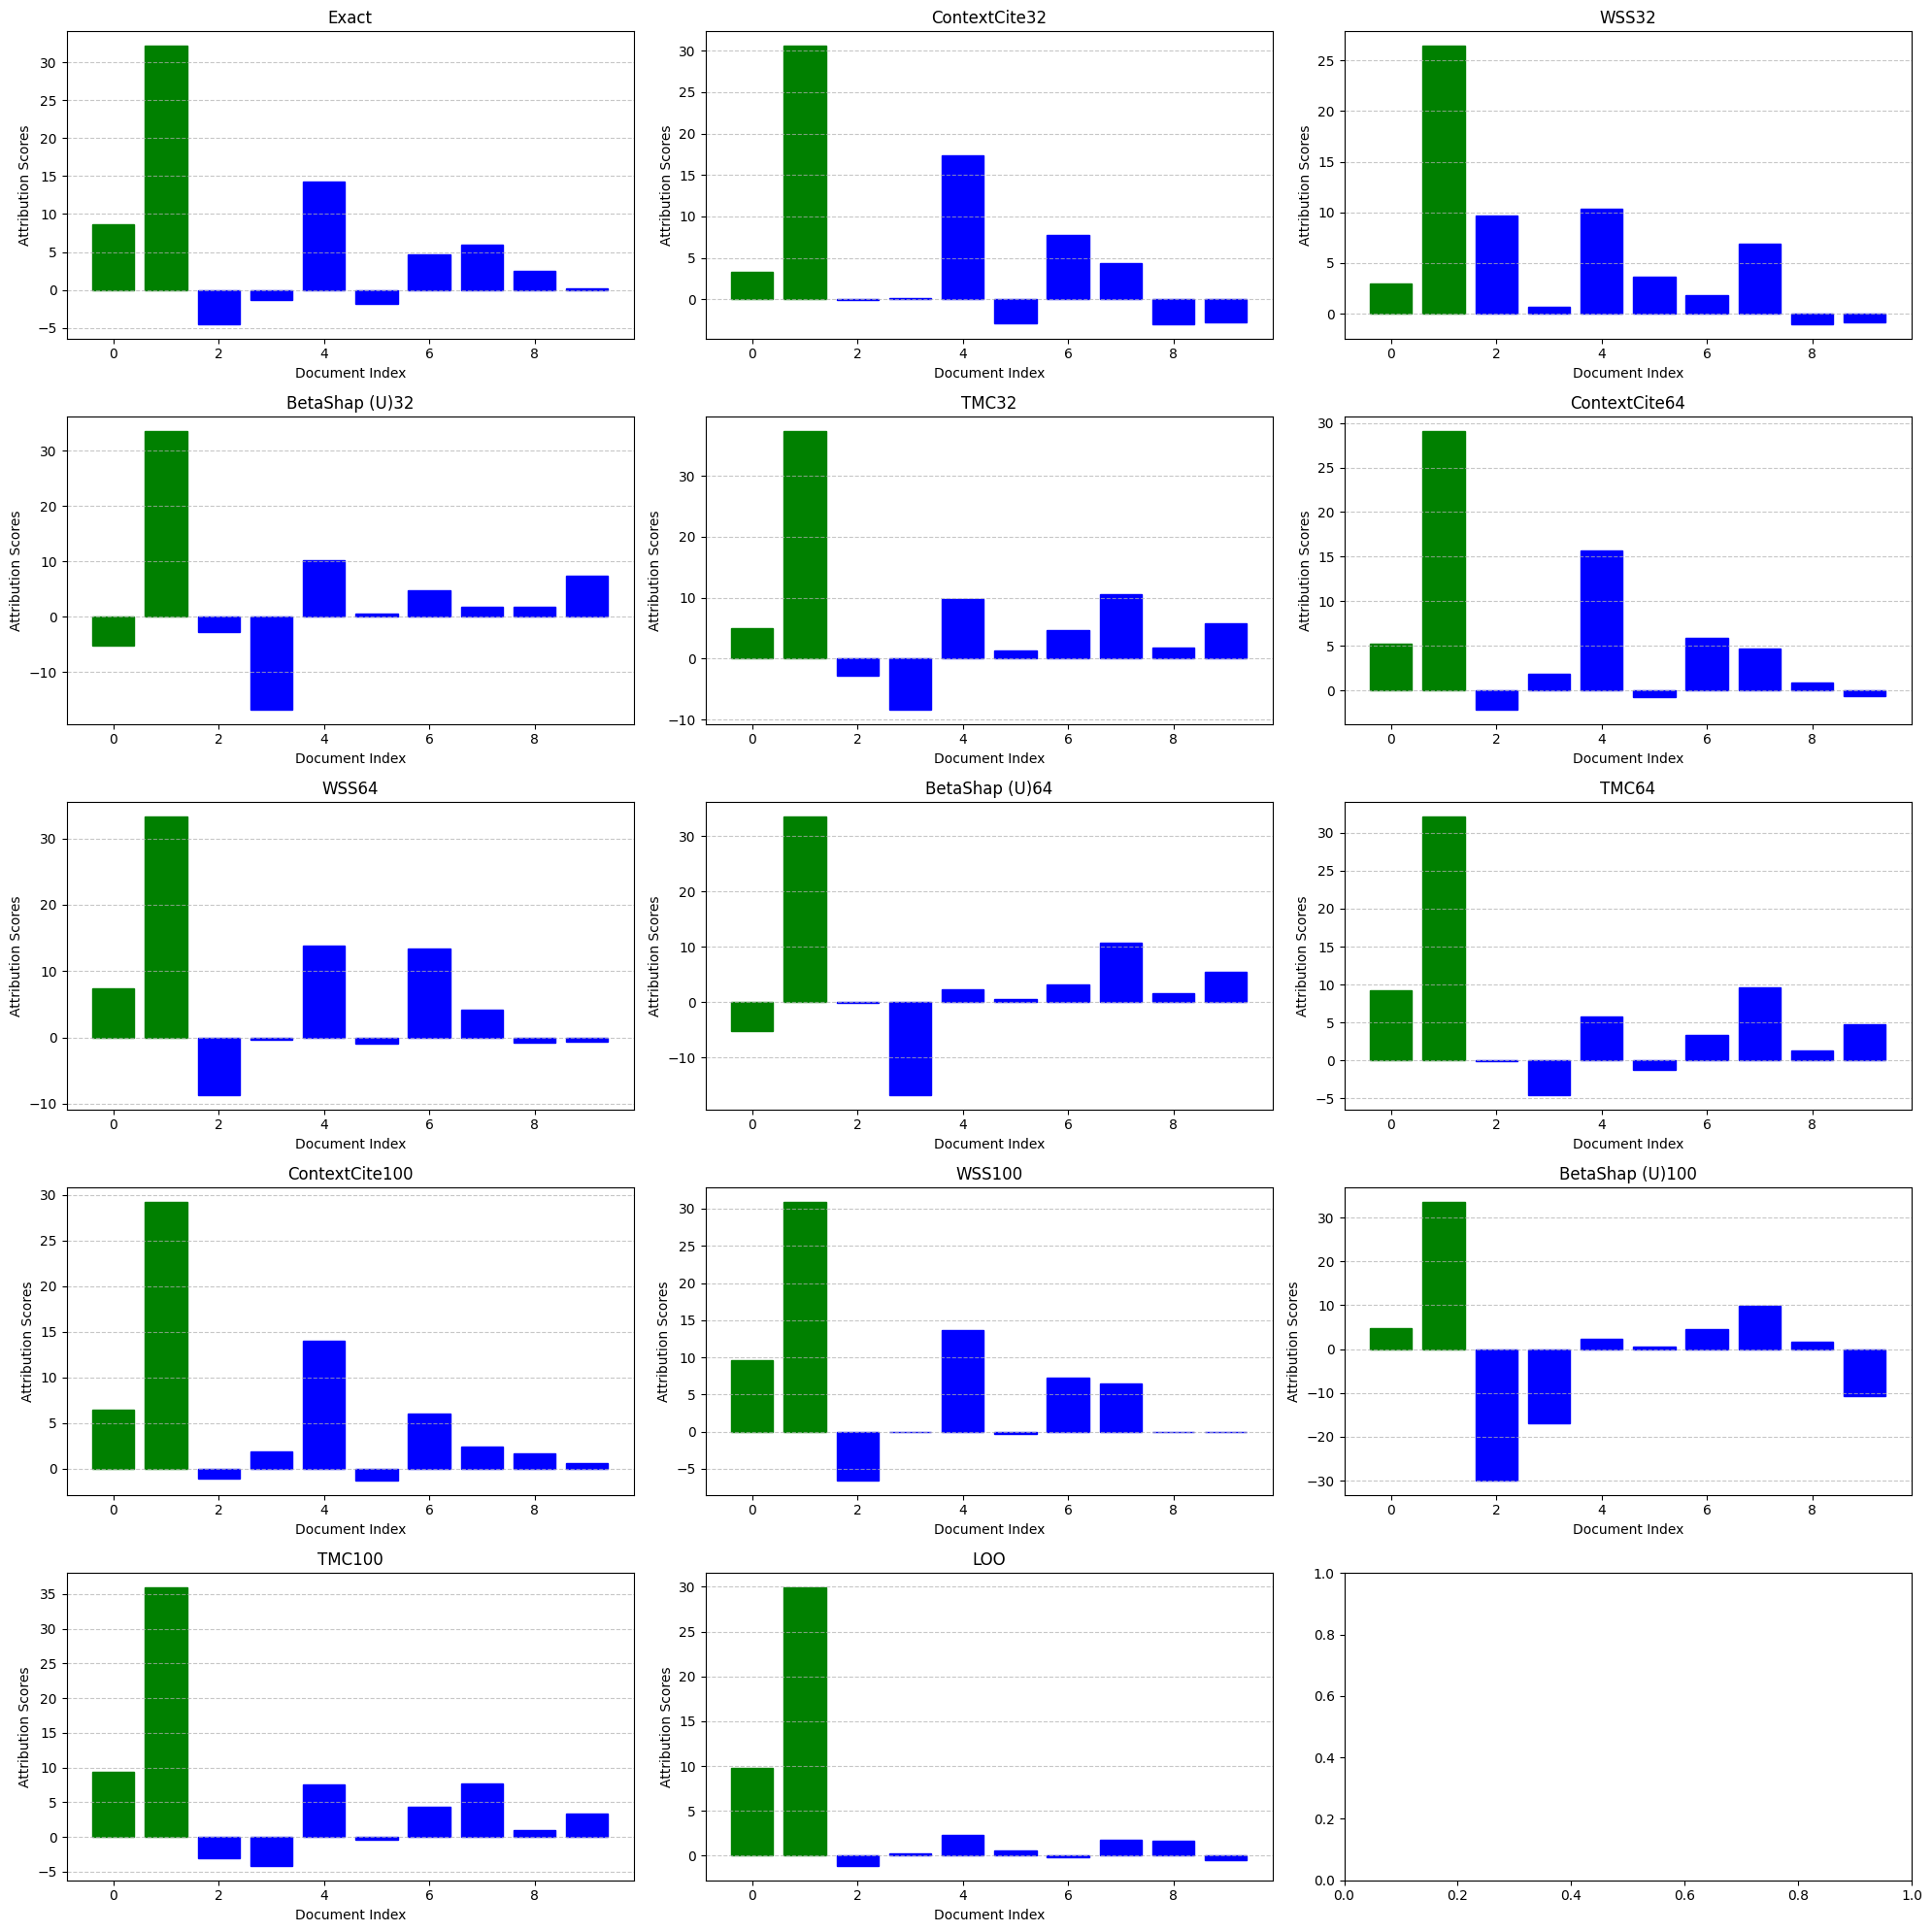

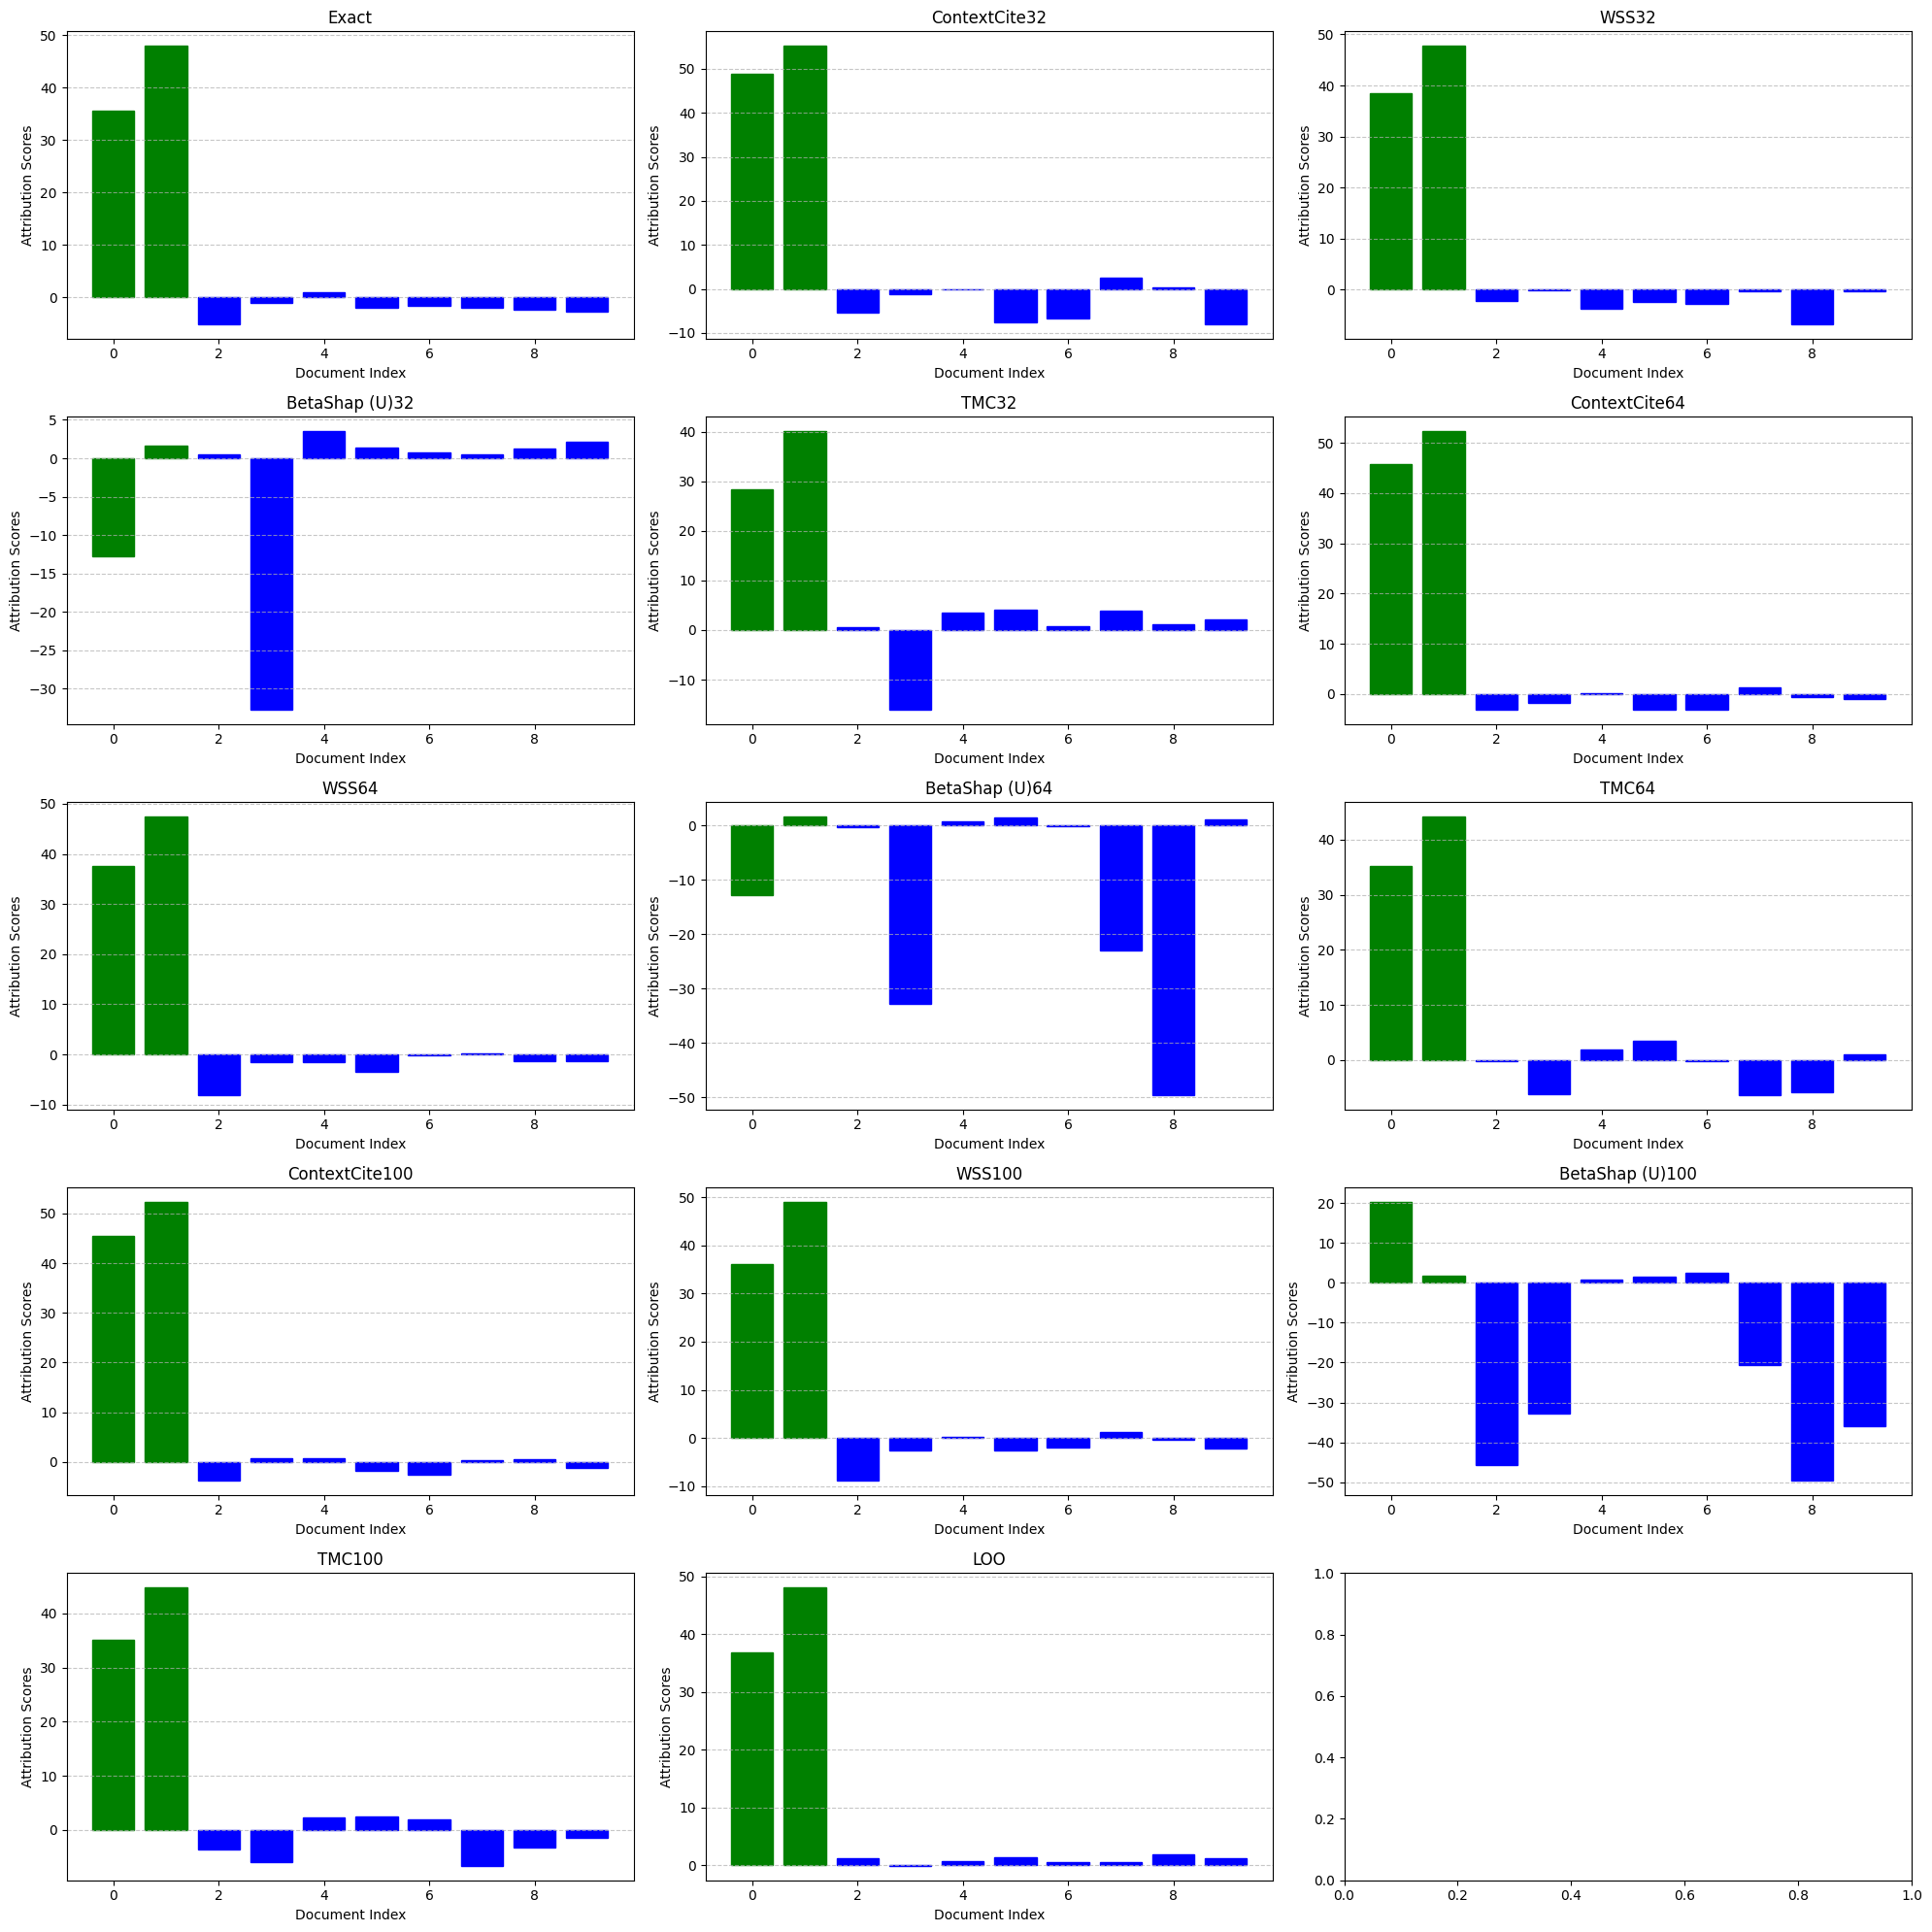

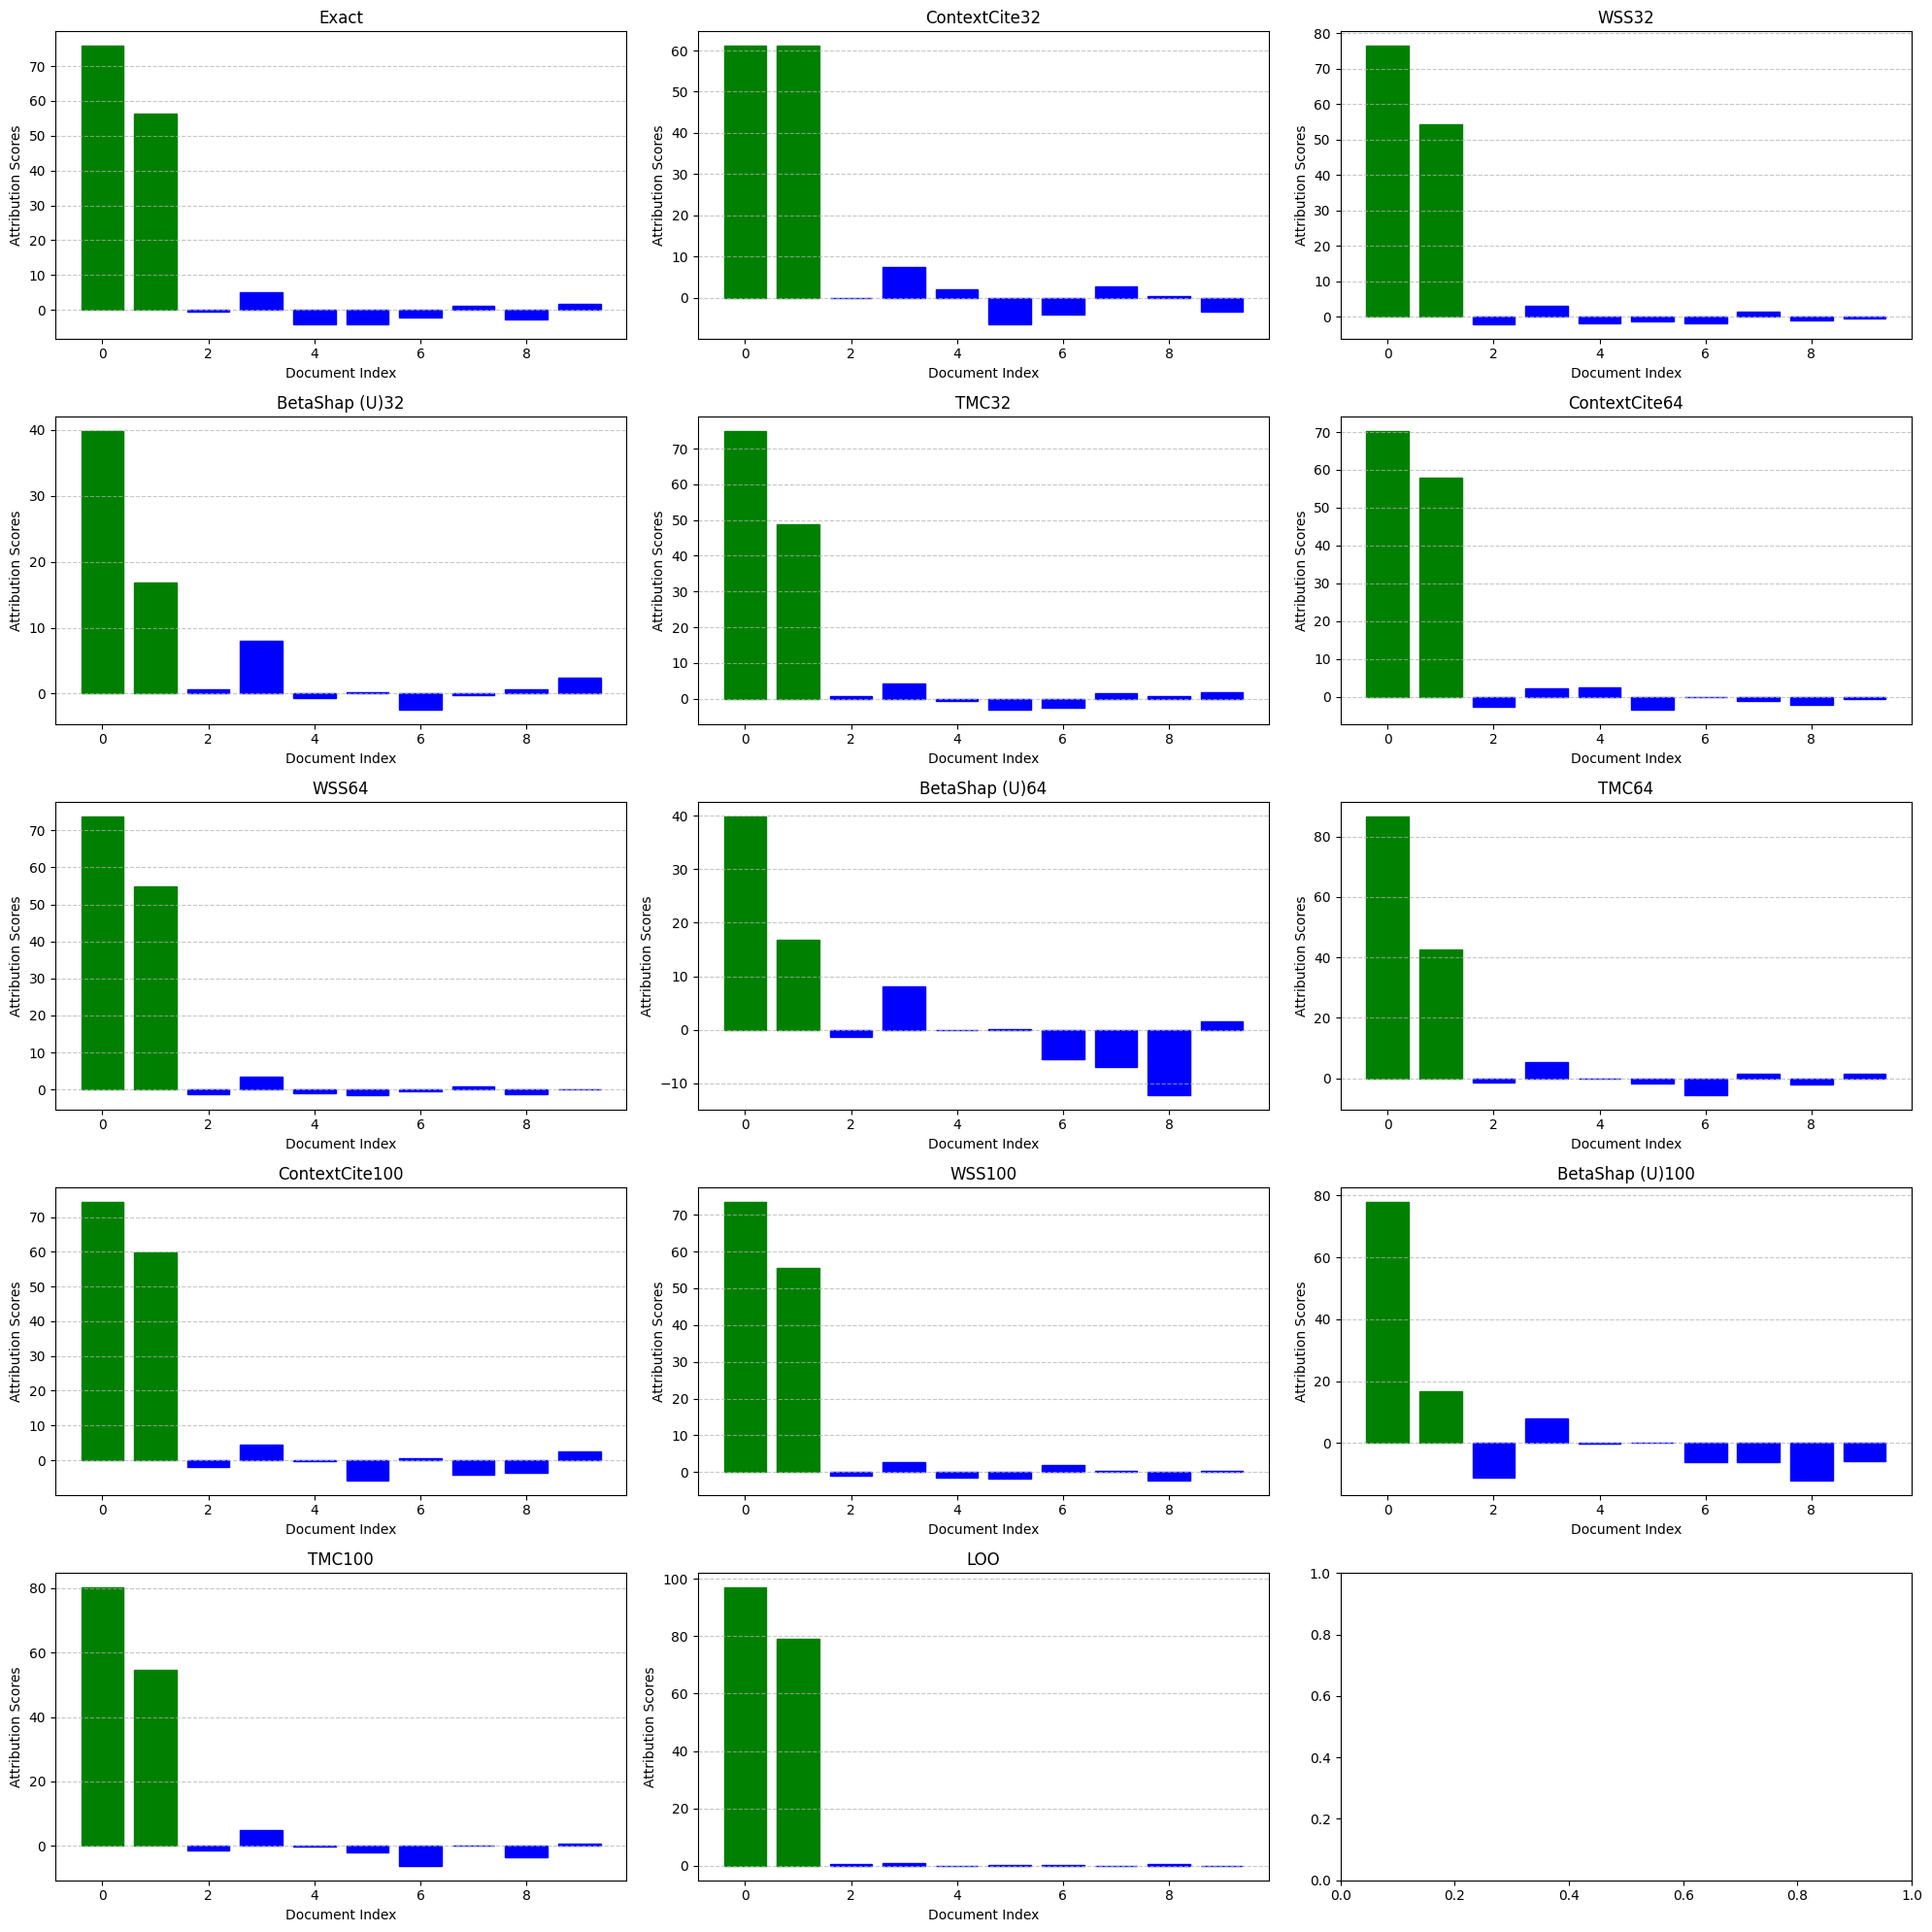

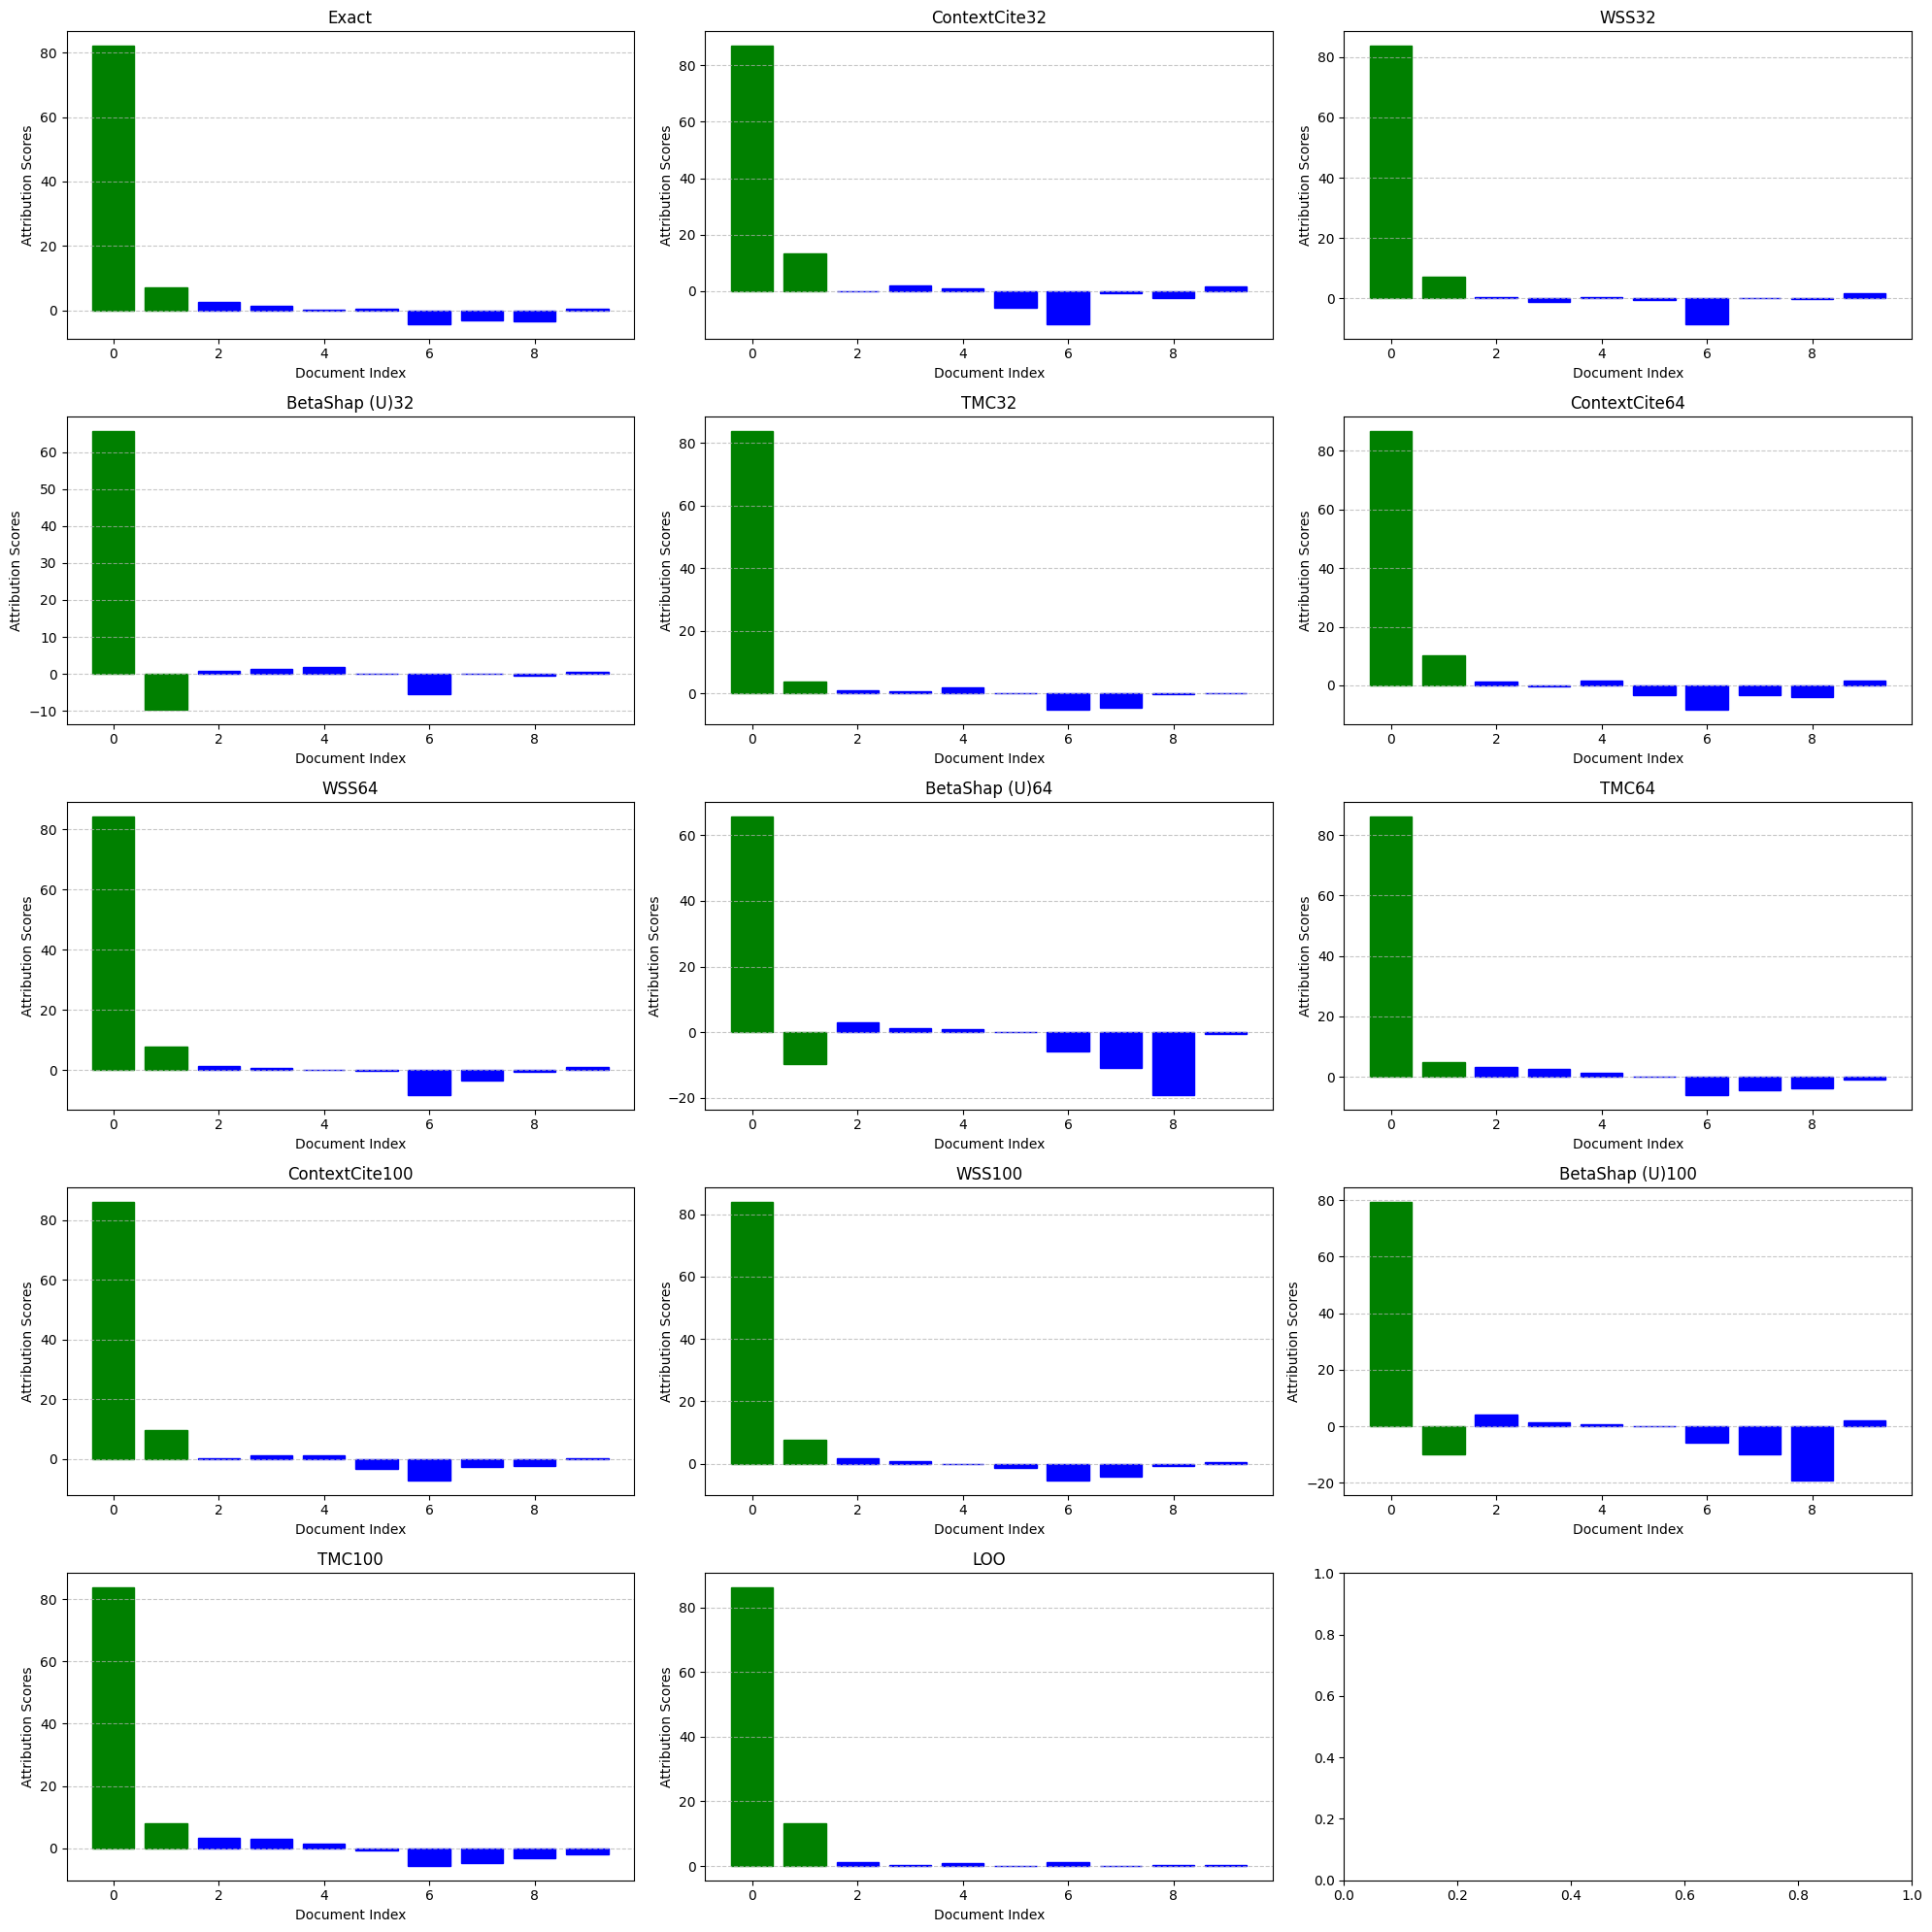

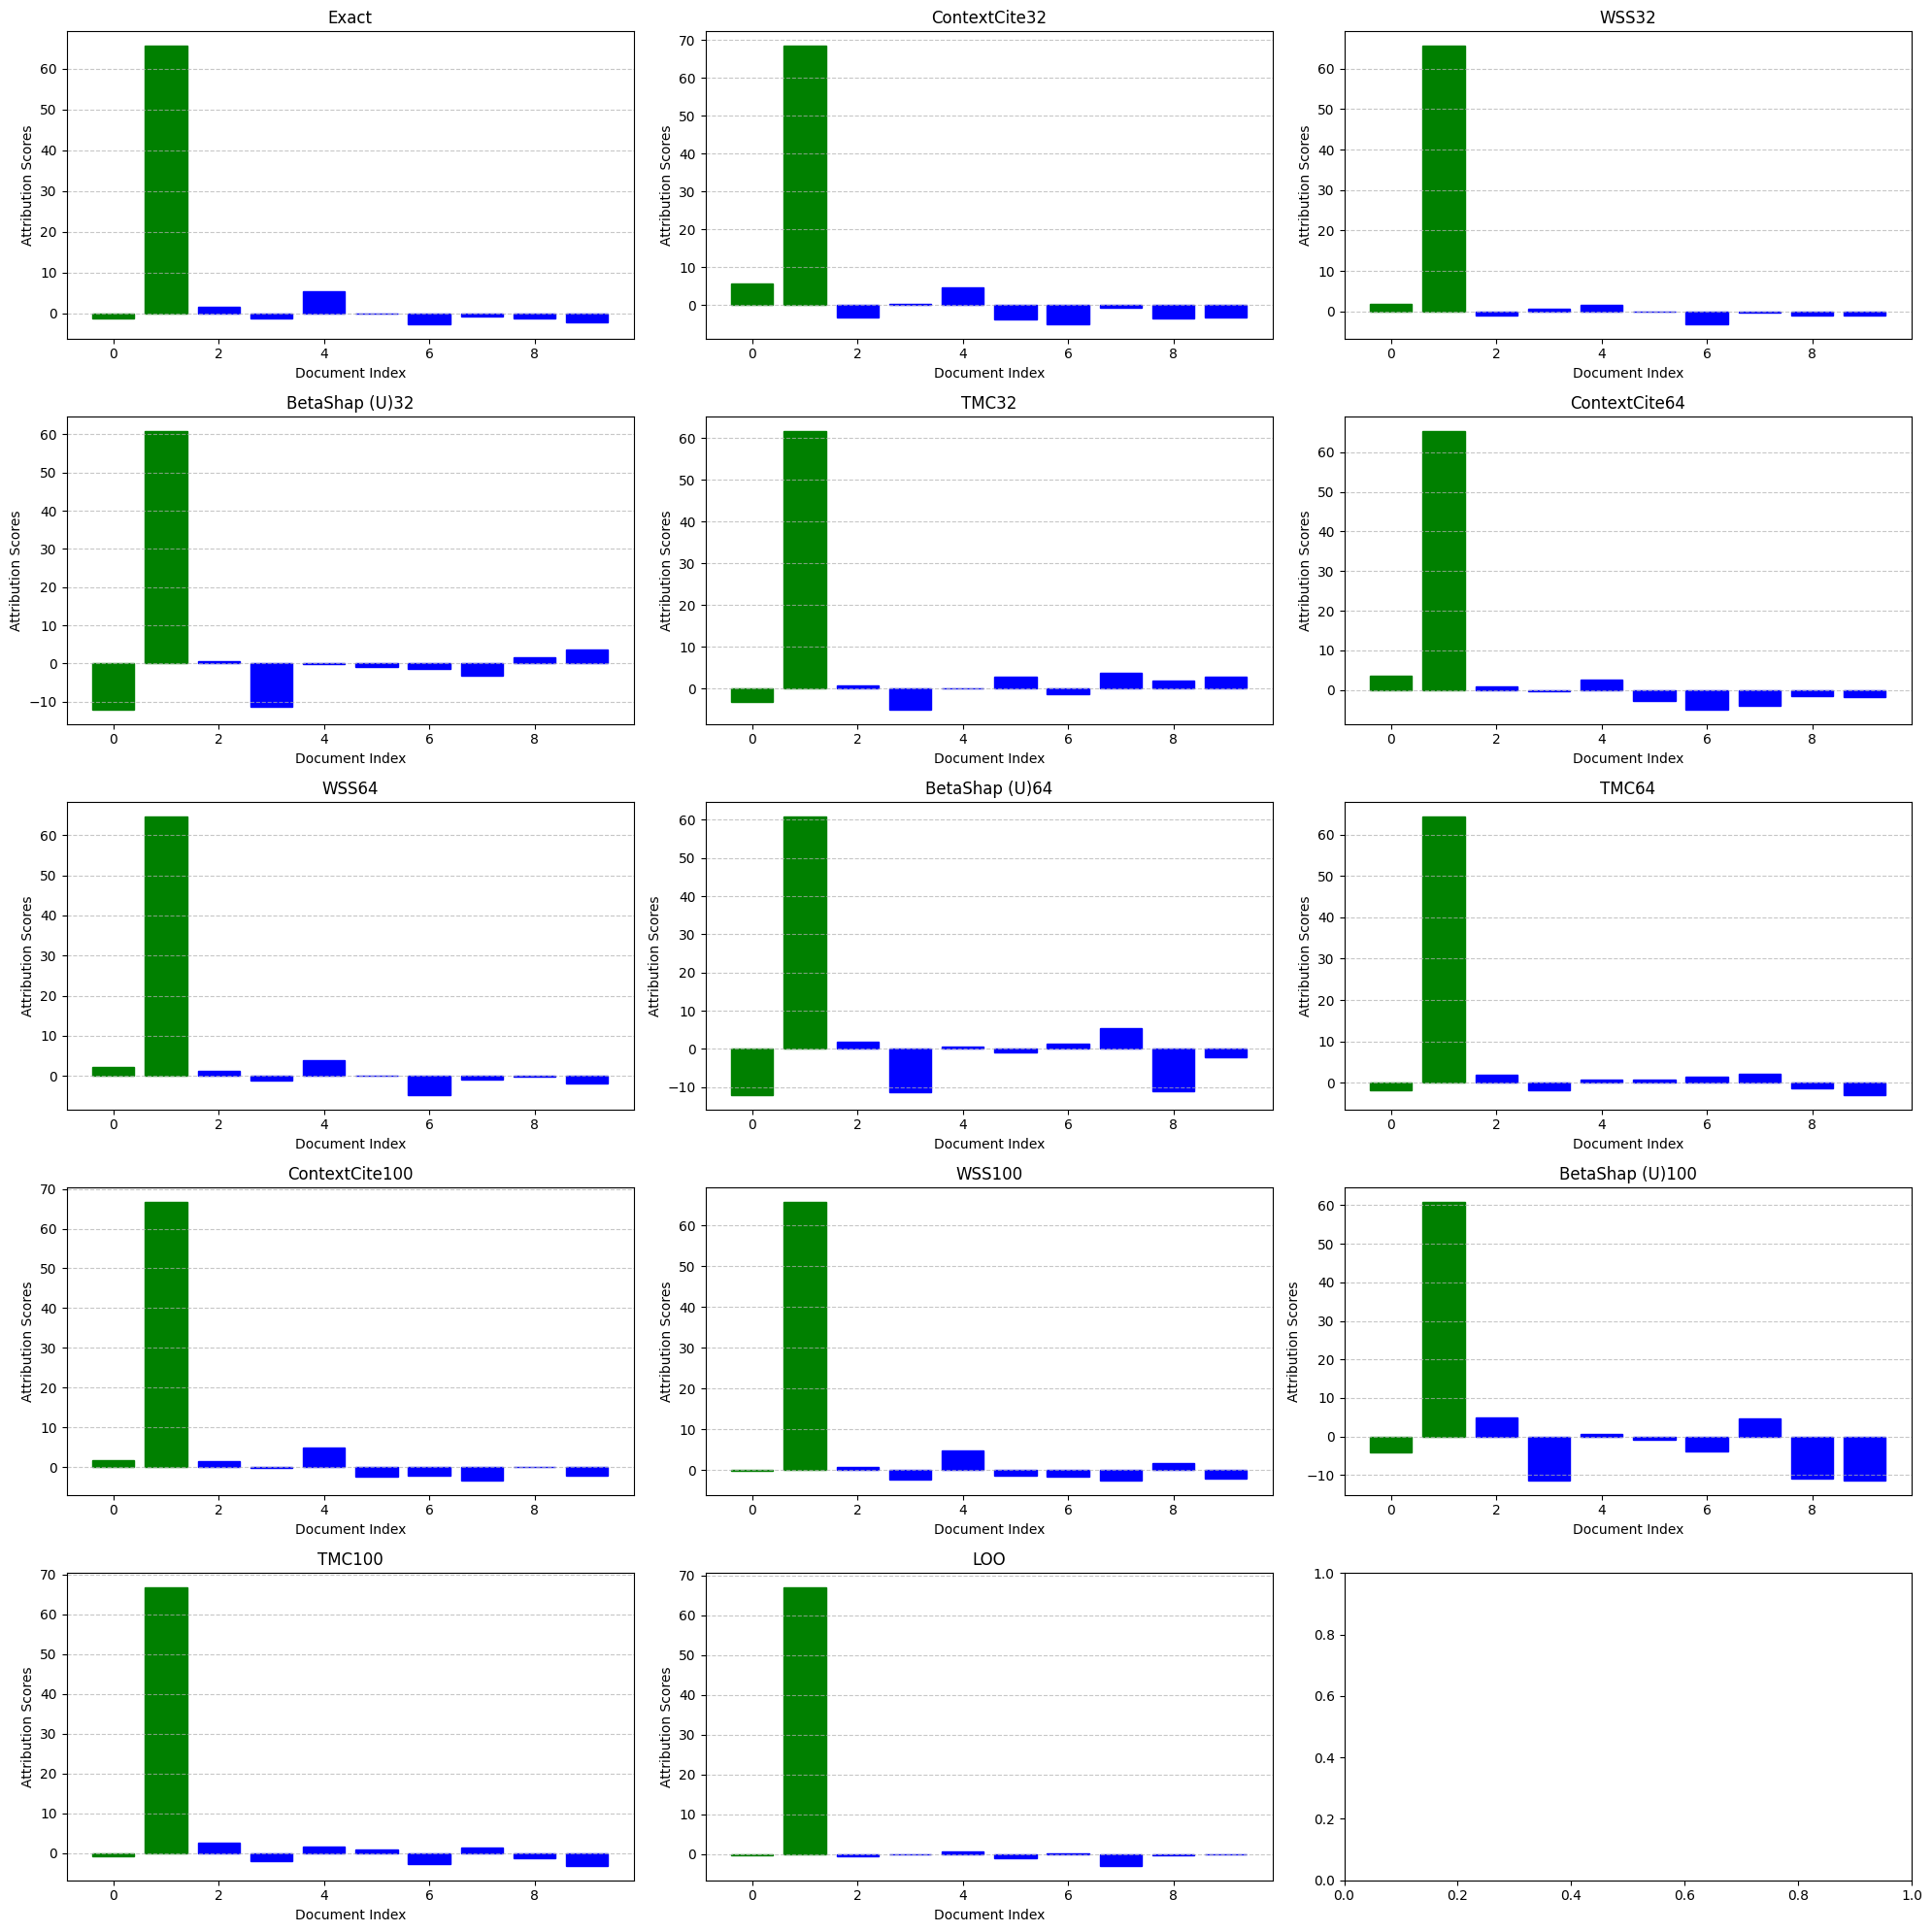

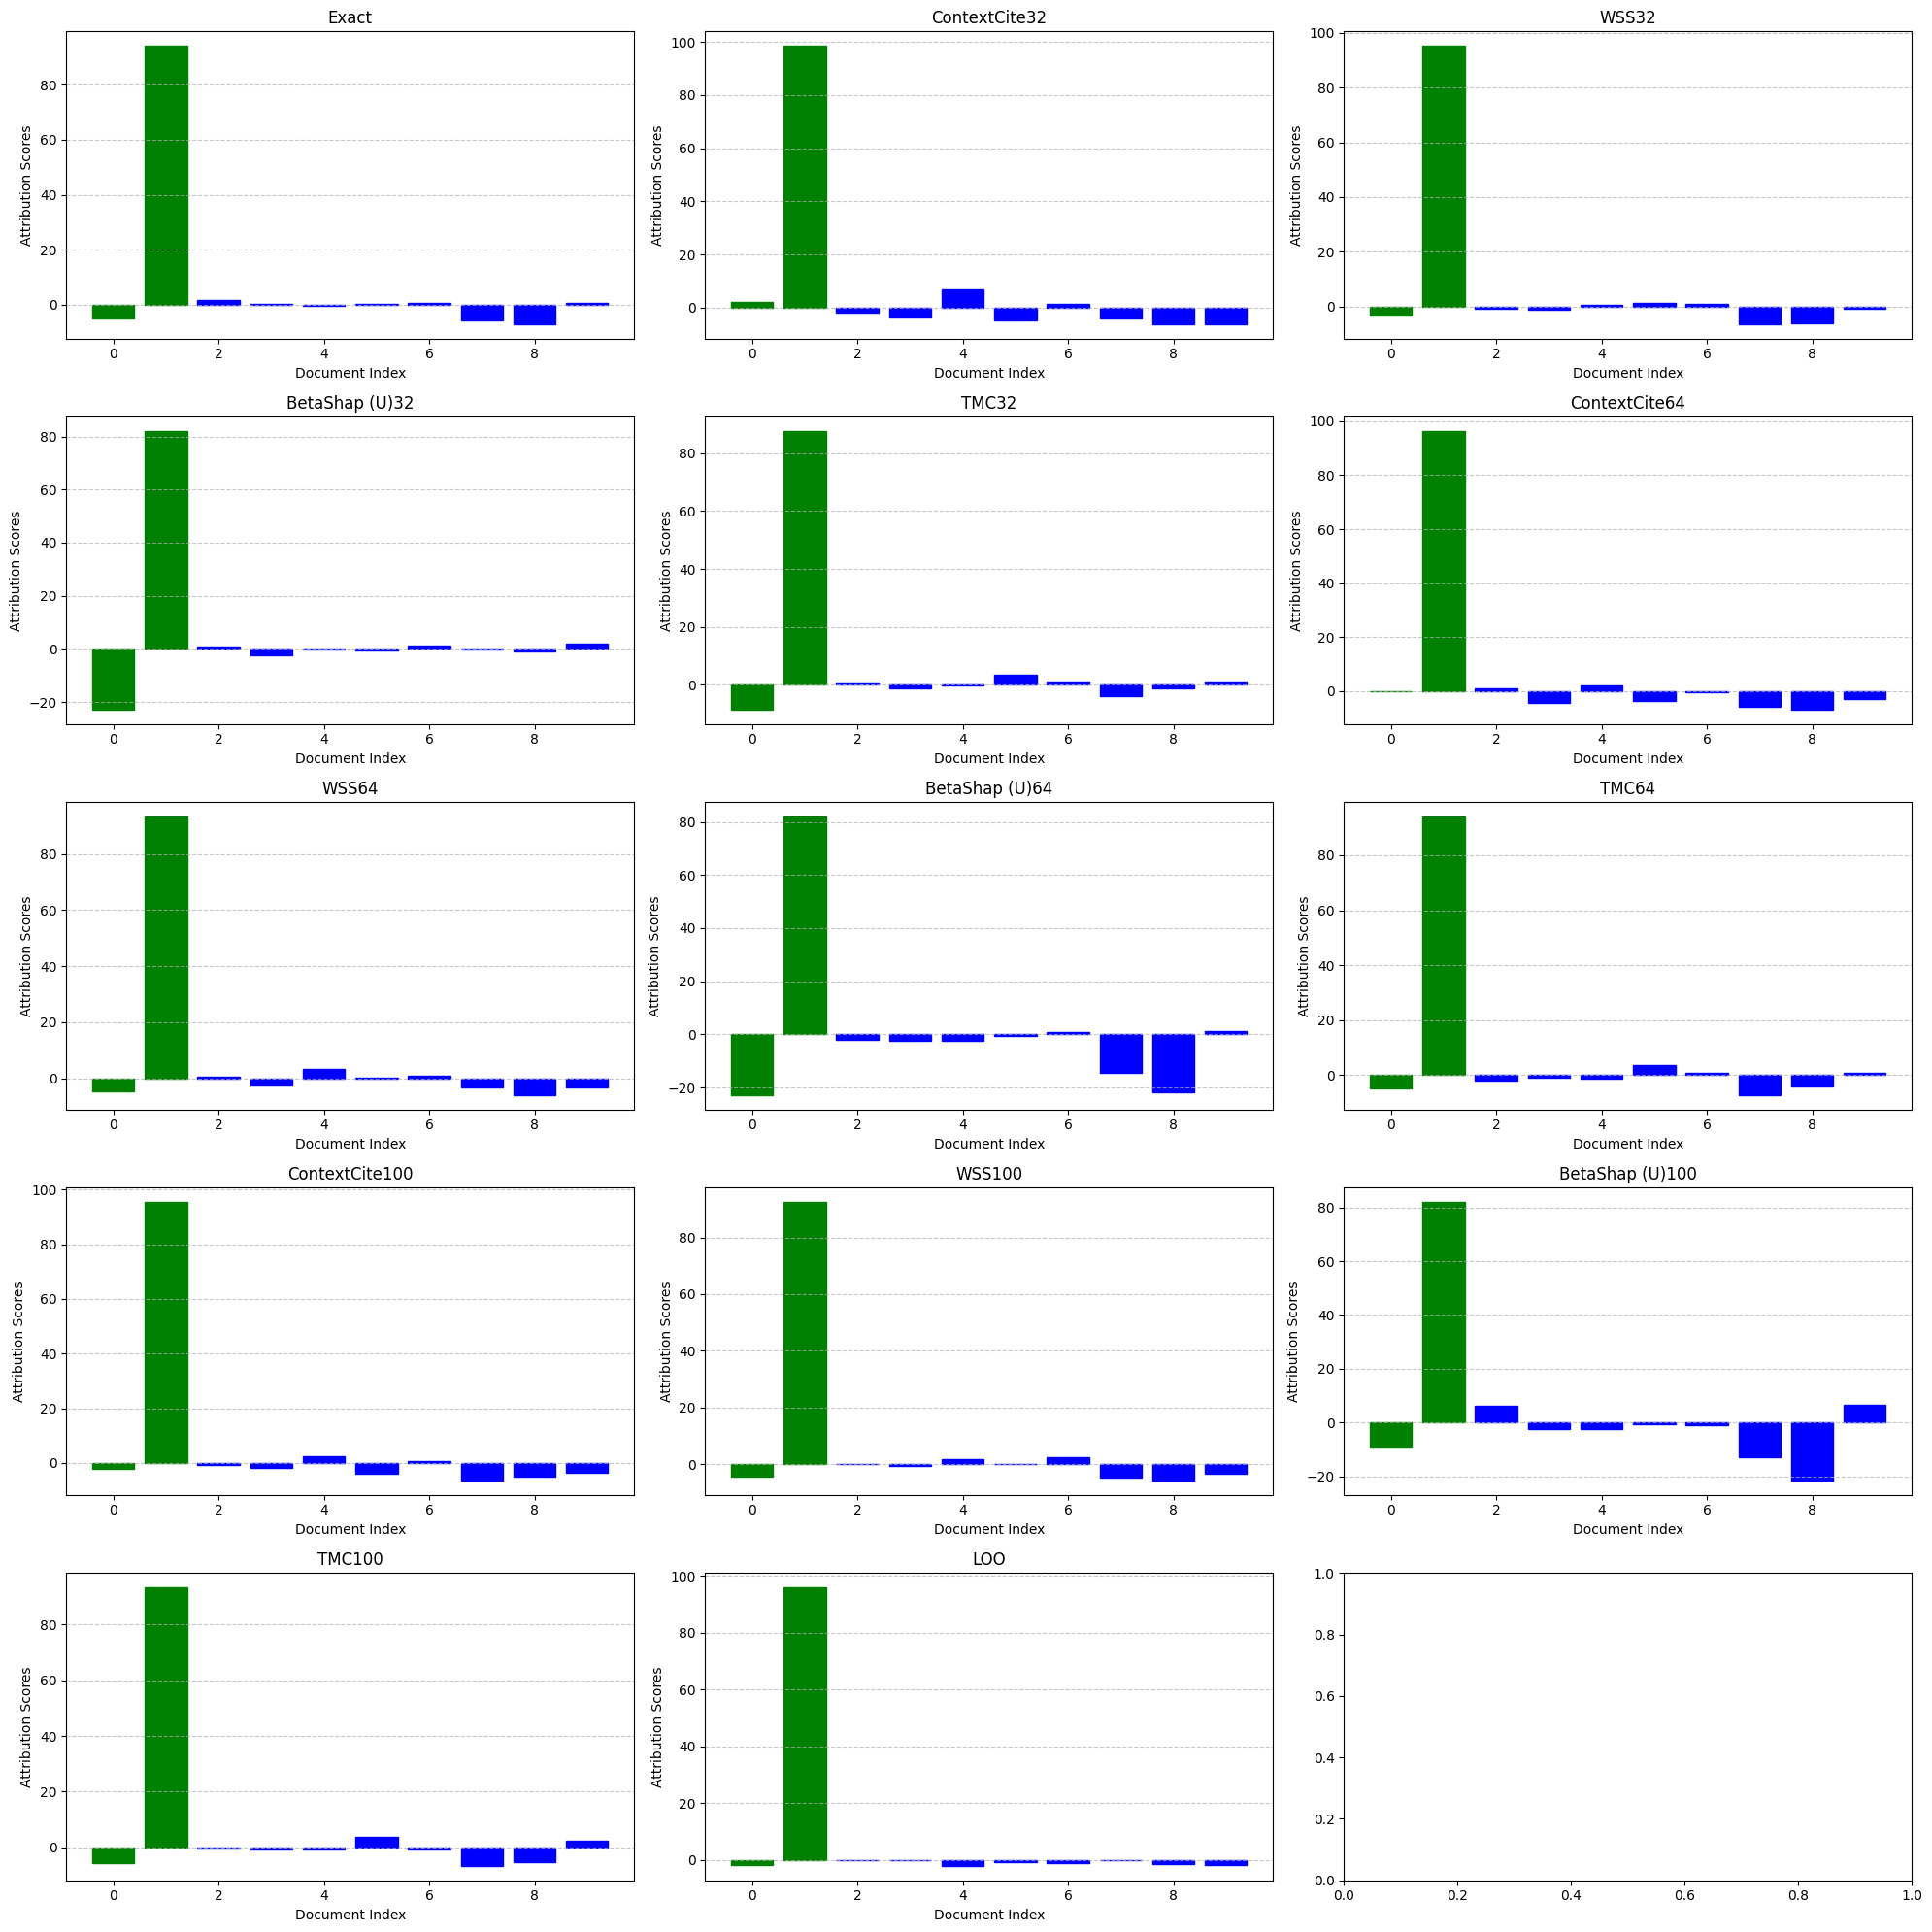

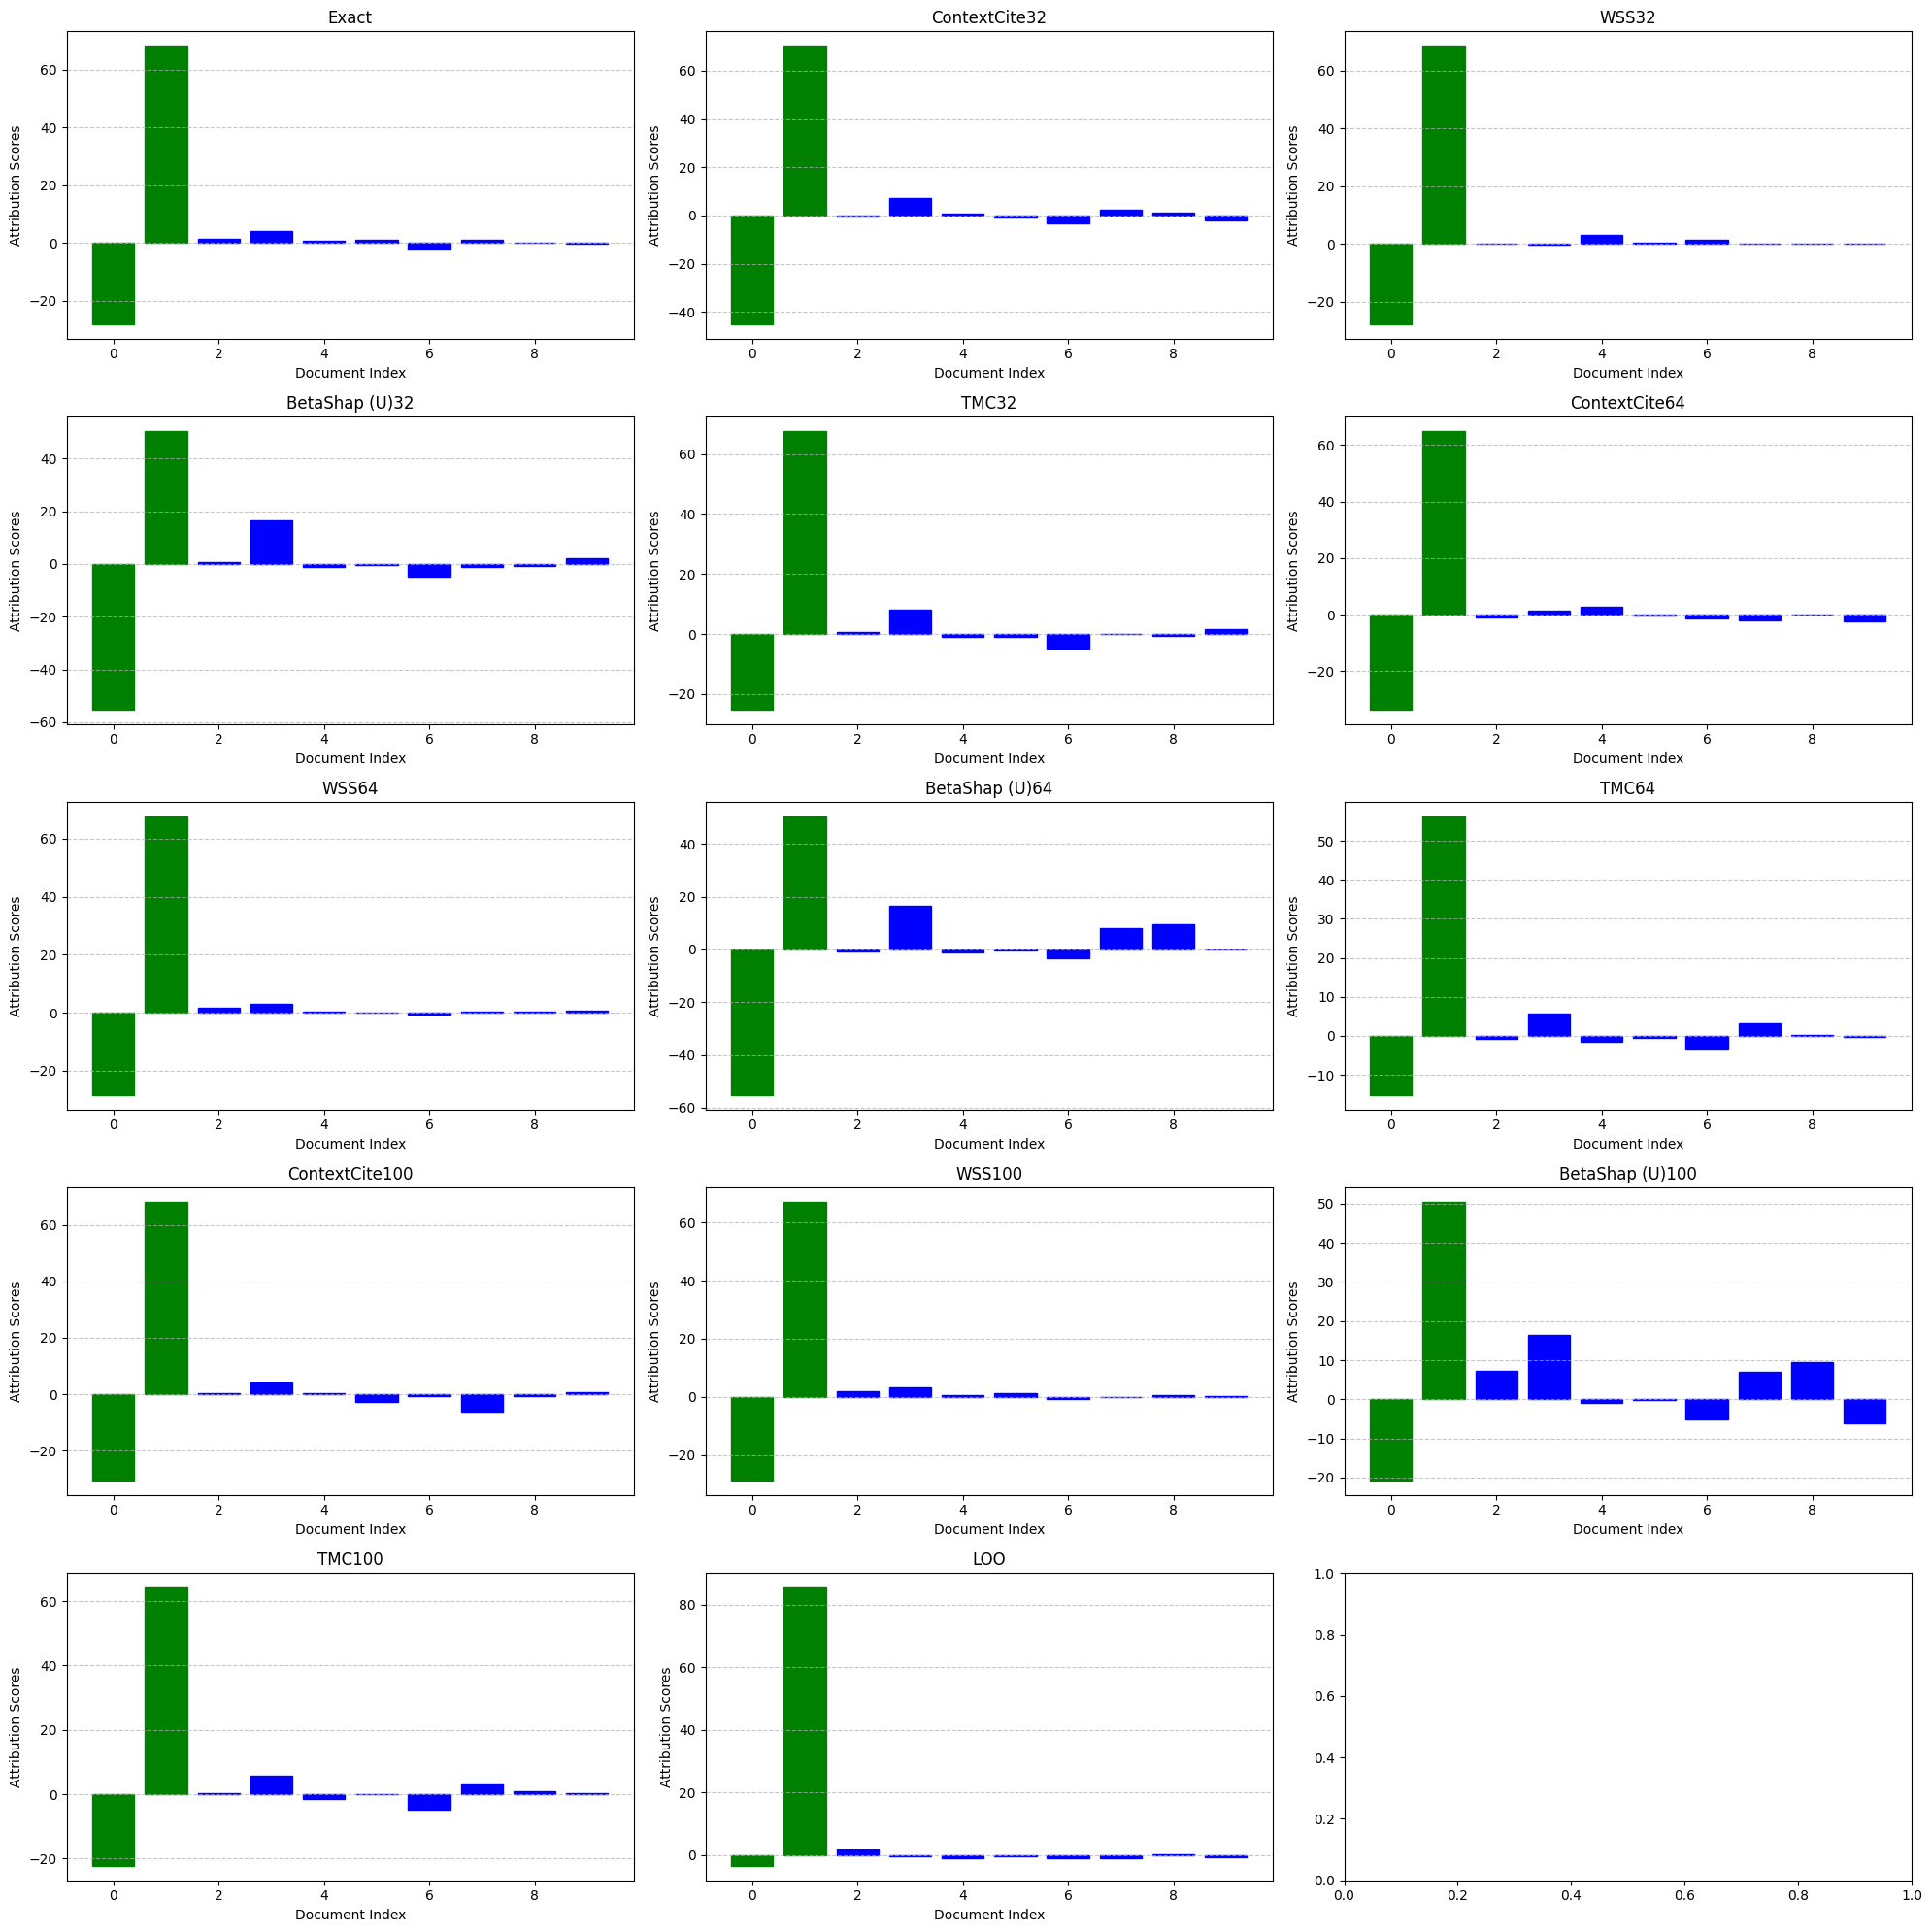

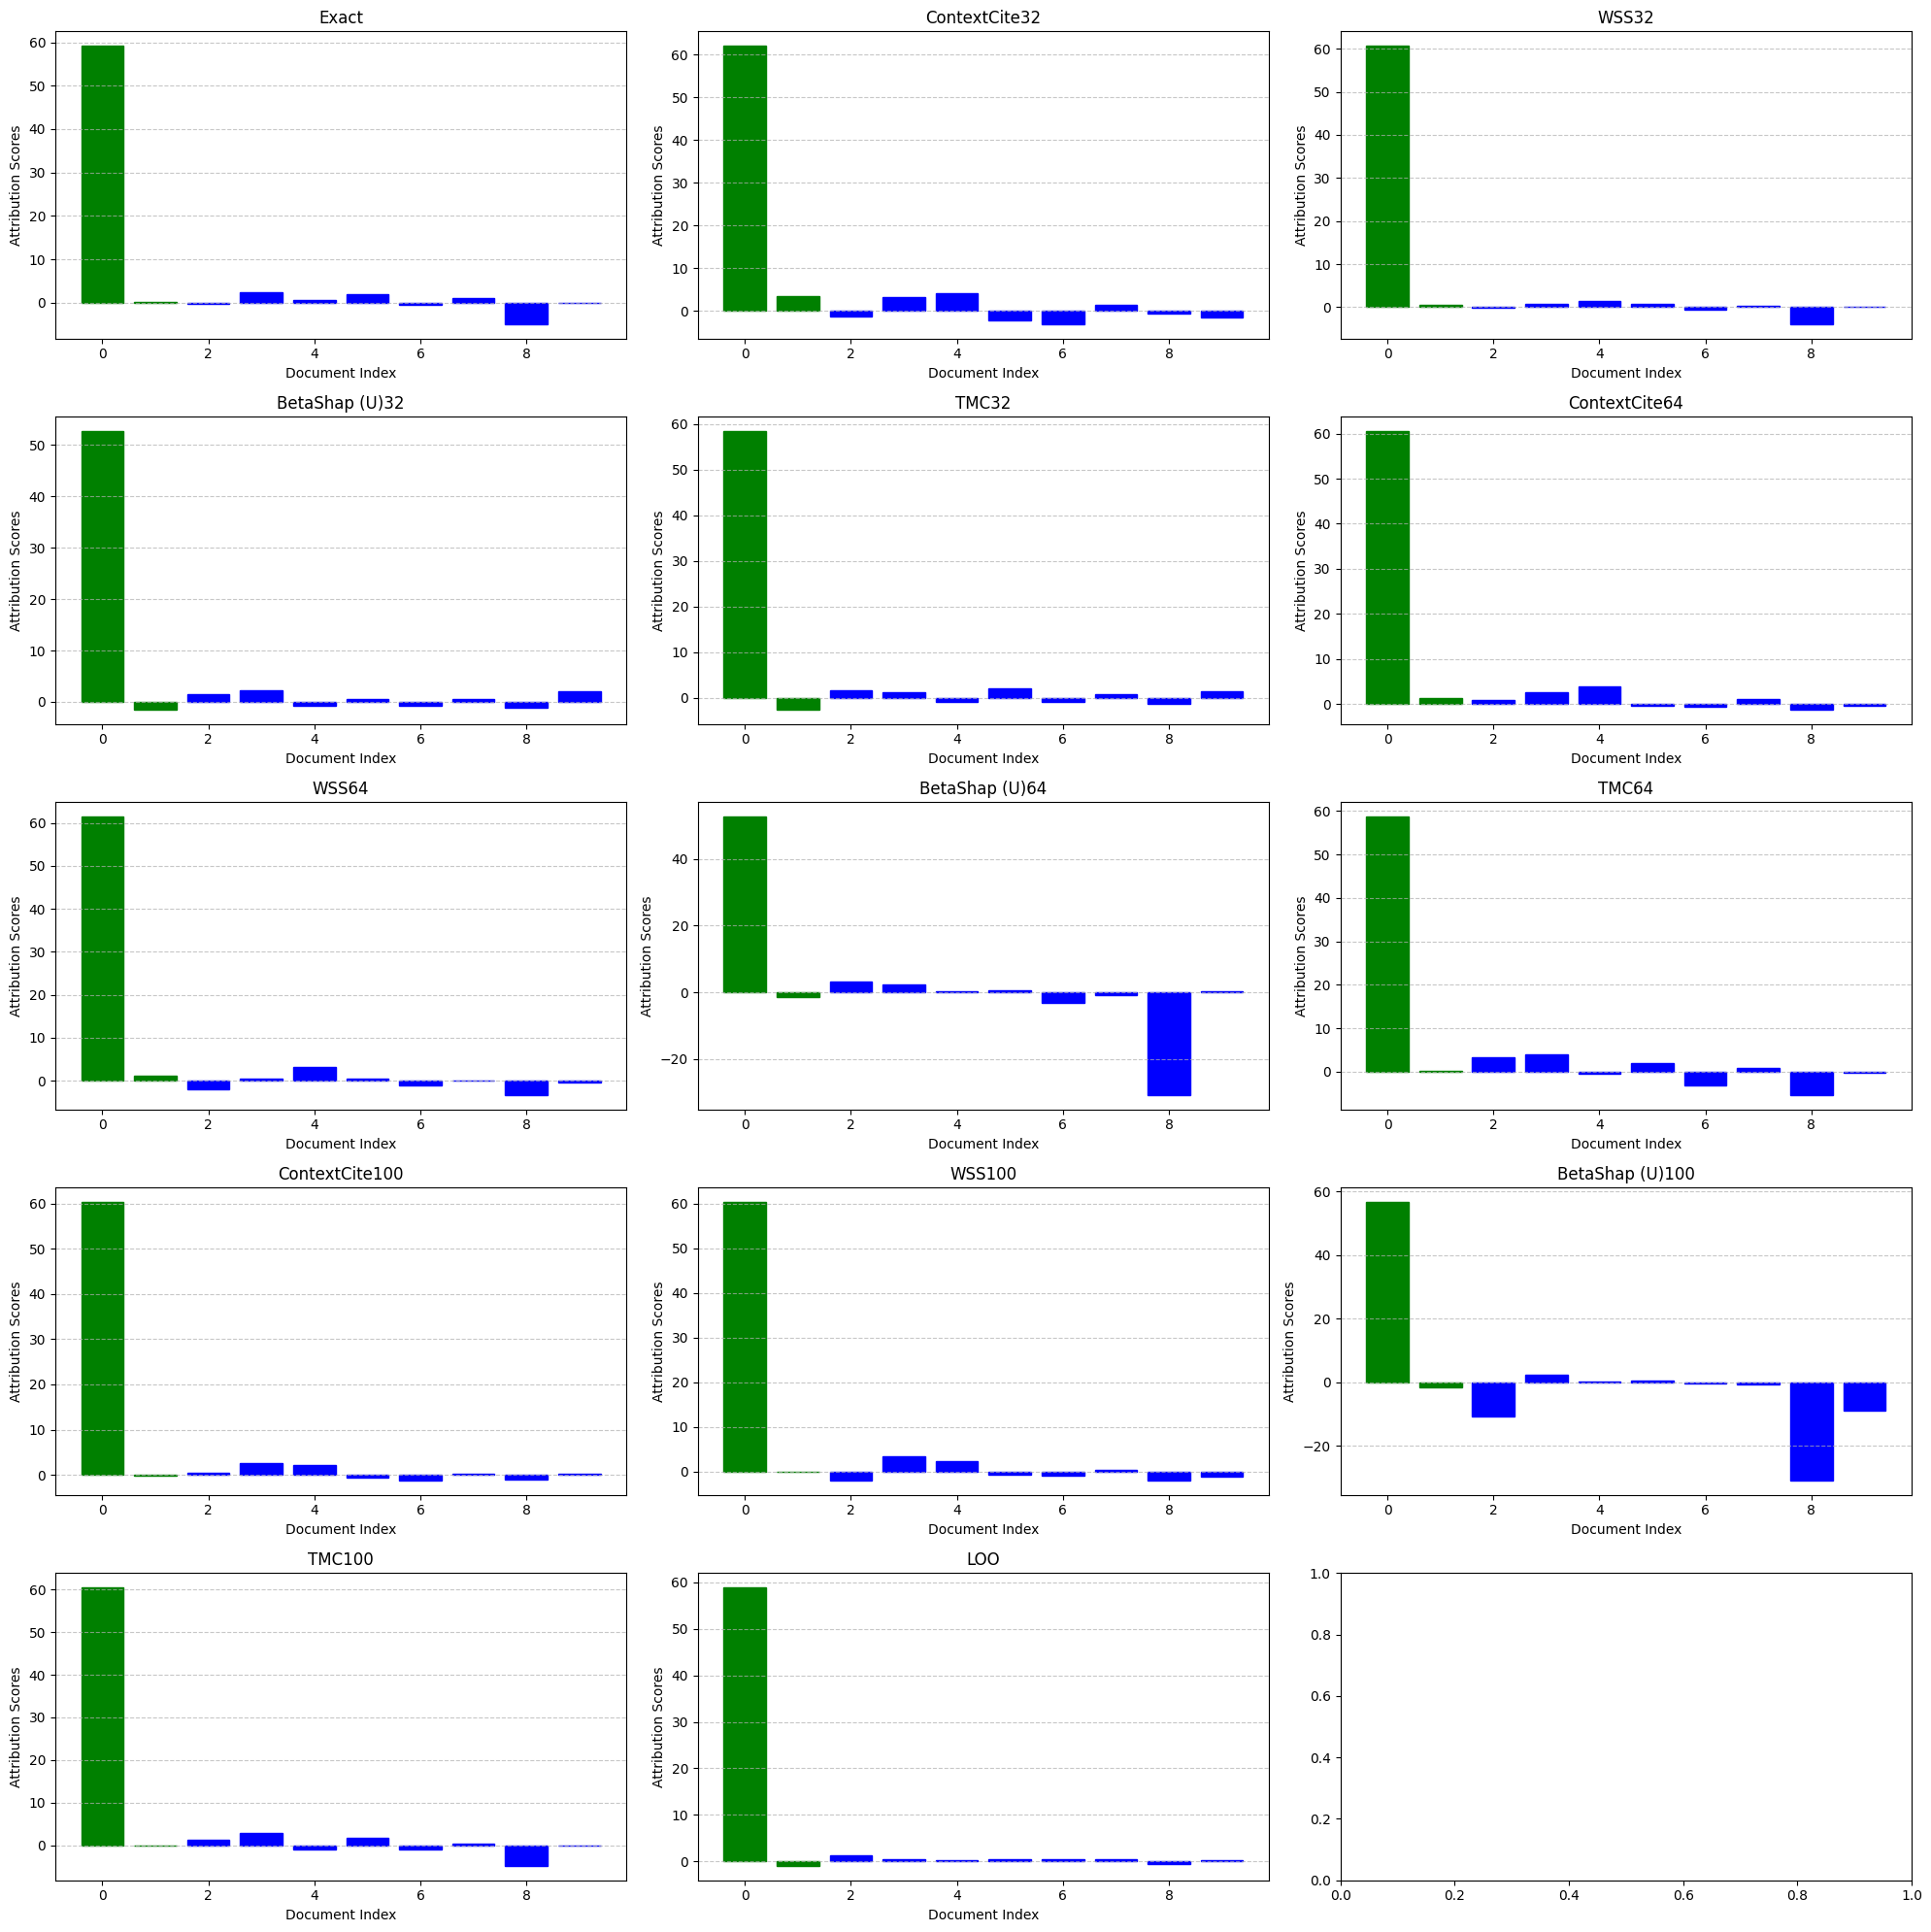

In [146]:
for dataset_type in ["duplicate"] : #
    for query_id in range(df.shape[0]) : 
        plot_scoring_per_query(scores_agg[query_id], query_id = query_id, dataset_type = dataset_type)

In [ ]:
# plt.figure(figsize = (15, 15))

# categories = scores[0]

# for i, cat in enumerate(categories) : 
#     # plt.subplot(1, 3, i+1)
#     sns.histplot(df_train[df_train.salary_category == cat]["feature_2"], 
#                 bins = 30, 
#                 kde = True,
#                 element="step",
#                 fill = False,
#                 label =  f"Category {cat}"
#                 )
# plt.title(f"feature_2 for salary category")
# plt.xlabel("feature_2")
# x = np.linspace(0.35, 1, 50)
# plt.xticks(np.linspace(x.min(), x.max(), 50), rotation=45, ha='right')
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.ylabel("Count")
# plt.legend(title="Category")
# plt.tight_layout()